In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.options.display.float_format = '{:.4f}'.format

# Load the Dataset

In [2]:
df = pd.read_csv('data/badDataSet.csv', sep='\t', header=None, na_values='?')

In [3]:
df.columns = [f'A{i+1}' for i in range(df.shape[1] - 1)] + ['T']

# Task 1
## Number of Instances

In [4]:
print(df.shape)

(581012, 63)


## Number of Descriptive Features

In [5]:
print(df.shape[1] - 1)

62


## Data Quality Reports for Descriptive Features

In [11]:
print(df.dtypes)

A1     float64
A2     float64
A3     float64
A4     float64
A5     float64
A6     float64
A7     float64
A8       int64
A9     float64
A10     object
A11      int64
A12    float64
A13    float64
A14      int64
A15      int64
A16    float64
A17      int64
A18    float64
A19      int64
A20    float64
A21    float64
A22      int64
A23      int64
A24      int64
A25      int64
A26      int64
A27      int64
A28      int64
A29      int64
A30      int64
A31      int64
A32      int64
A33      int64
A34      int64
A35      int64
A36      int64
A37      int64
A38      int64
A39      int64
A40      int64
A41      int64
A42      int64
A43      int64
A44      int64
A45      int64
A46      int64
A47      int64
A48      int64
A49      int64
A50      int64
A51      int64
A52      int64
A53      int64
A54      int64
A55      int64
A56      int64
A57      int64
A58      int64
A59      int64
A60      int64
A61      int64
A62      int64
T      float64
dtype: object


In [7]:
df_des_feat = df[[f'A{i}' for i in range(1, 63)]]

report = df_des_feat.describe().T

report['% Miss.'] = (df_des_feat.isnull().sum() / len(df_des_feat)) * 100
report['Card.'] = df_des_feat.nunique()

# Rename cols
report = report.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Std. Dev.',
    'min': 'Min.',
    '25%': '1st Qrt.',
    '50%': 'Median',
    '75%': '3rd Qrt.',
    'max': 'Max.'
})

final_column_order = ['Count', '% Miss.', 'Card.', 'Min.', '1st Qrt.', 'Mean', 'Median', '3rd Qrt.', 'Max.', 'Std. Dev.']

report_des_feat = report[final_column_order].reset_index().rename(columns={'index': 'Feature'})

print(report_des_feat.to_string())

   Feature       Count  % Miss.   Card.         Min.     1st Qrt.         Mean       Median     3rd Qrt.           Max.    Std. Dev.
0       A1 581012.0000   0.0000    1978 2054845.6500 3104928.1500 3271134.4350 3311628.6000 3496222.0500   4264440.3000  309481.1260
1       A2 578069.0000   0.5065     361       0.0000      58.0000     155.6572     127.0000     260.0000       360.0000     111.9140
2       A3 581012.0000   0.0000  576099       0.0000     145.4945     389.9193     318.1206     652.5318       903.4838     280.3431
3       A4 580708.0000   0.0523      67       0.0000       9.0000      14.1037      13.0000      18.0000        66.0000       7.4884
4       A5 578069.0000   0.5065     569    -691.0000     108.0000     269.4240     218.0000     384.0000      1397.0000     212.5619
5       A6 581012.0000   0.0000  581012    -173.0651       6.9858      46.4188      29.9087      68.9661       600.9505      58.2952
6       A7 578069.0000   0.5065  577988      -1.0000      -0.4997    

## Data Quality Report for A10 (Contains Incorrect Data Type)

In [12]:
a10_series = df['A10'].copy()

count = a10_series.count()

percent_missing = (a10_series.isnull().sum() / len(a10_series)) * 100

cardinality = a10_series.nunique()

# Clean by replacing non-numeric with NaN
a10_numeric = pd.to_numeric(a10_series, errors='coerce')

stats = a10_numeric.describe()

report_a10 = pd.Series({
    'Feature': 'A10',
    'Count': count,
    '% Miss.': percent_missing,
    'Card.': cardinality,
    'Min.': stats['min'],
    '1st Qrt.': stats['25%'],
    'Mean': stats['mean'],
    'Median': stats['50%'],
    '3rd Qrt.': stats['75%'],
    'Max.': stats['max'],
    'Std. Dev.': stats['std']
})

print(report_a10.to_string())

Feature          A10
Count         578069
% Miss.       0.5065
Card.            186
Min.          0.0000
1st Qrt.    213.0000
Mean        223.3170
Median      226.0000
3rd Qrt.    237.0000
Max.        254.0000
Std. Dev.    19.7679


## Data Quality Report for Response Feature

In [8]:
report = df[['T']].describe().T

report['% Miss.'] = (df['T'].isnull().sum() / len(df)) * 100
report['Card.'] = df['T'].nunique()

# Rename cols
report = report.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Std. Dev.',
    'min': 'Min.',
    '25%': '1st Qrt.',
    '50%': 'Median',
    '75%': '3rd Qrt.',
    'max': 'Max.'
})

final_column_order = ['Count', '% Miss.', 'Card.', 'Min.', '1st Qrt.', 'Mean', 'Median', '3rd Qrt.', 'Max.', 'Std. Dev.']

report_res_feat = report[final_column_order].reset_index().rename(columns={'index': 'Feature'})

print(report_res_feat.to_string())

  Feature       Count  % Miss.  Card.   Min.  1st Qrt.   Mean  Median  3rd Qrt.   Max.  Std. Dev.
0       T 580952.0000   0.0103      7 1.0000    1.0000 2.0515  2.0000    2.0000 7.0000     1.3965


# Task 2

In [9]:
def feature_distribution(feature):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f'Visual Analysis of {feature}', fontsize=16)

    sns.histplot(data=df, x=feature, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequency')

    sns.boxplot(data=df, y=feature, ax=axes[1])
    axes[1].set_title(f'Boxplot of {feature}')
    axes[1].set_ylabel(feature)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

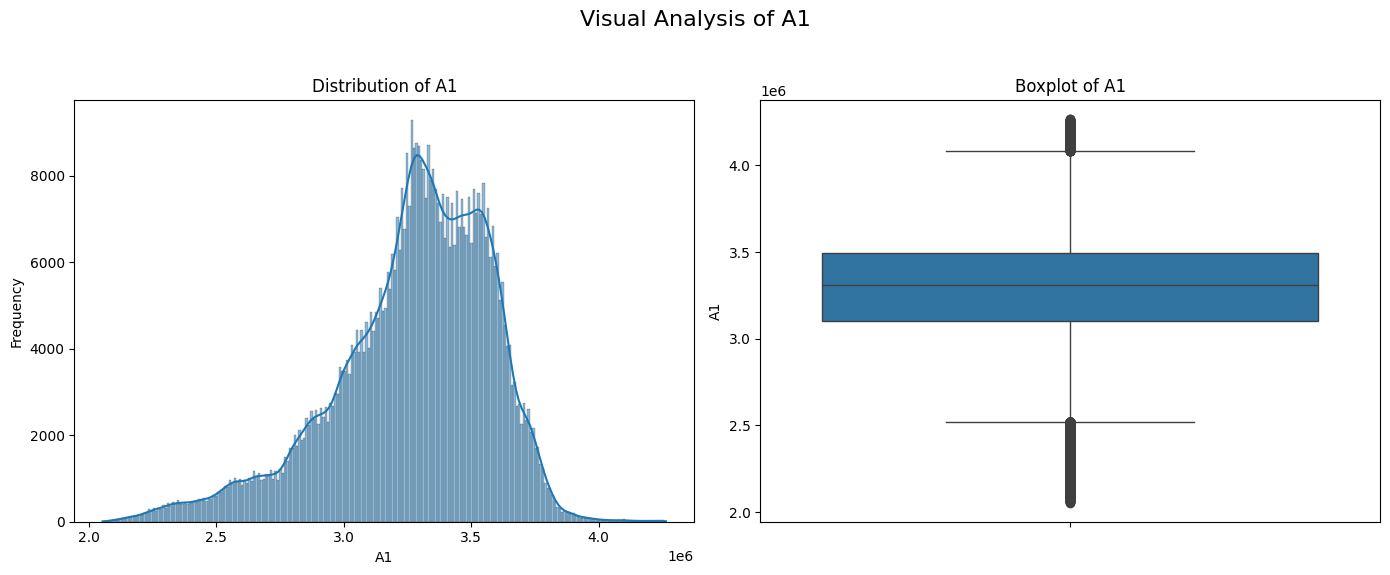

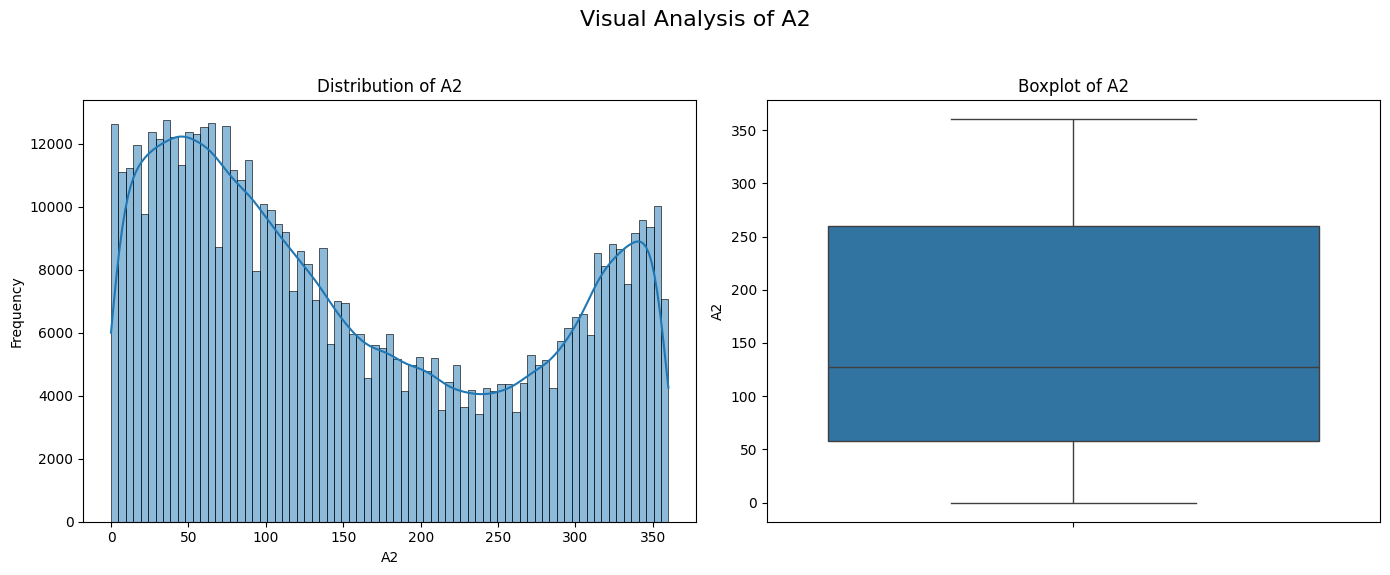

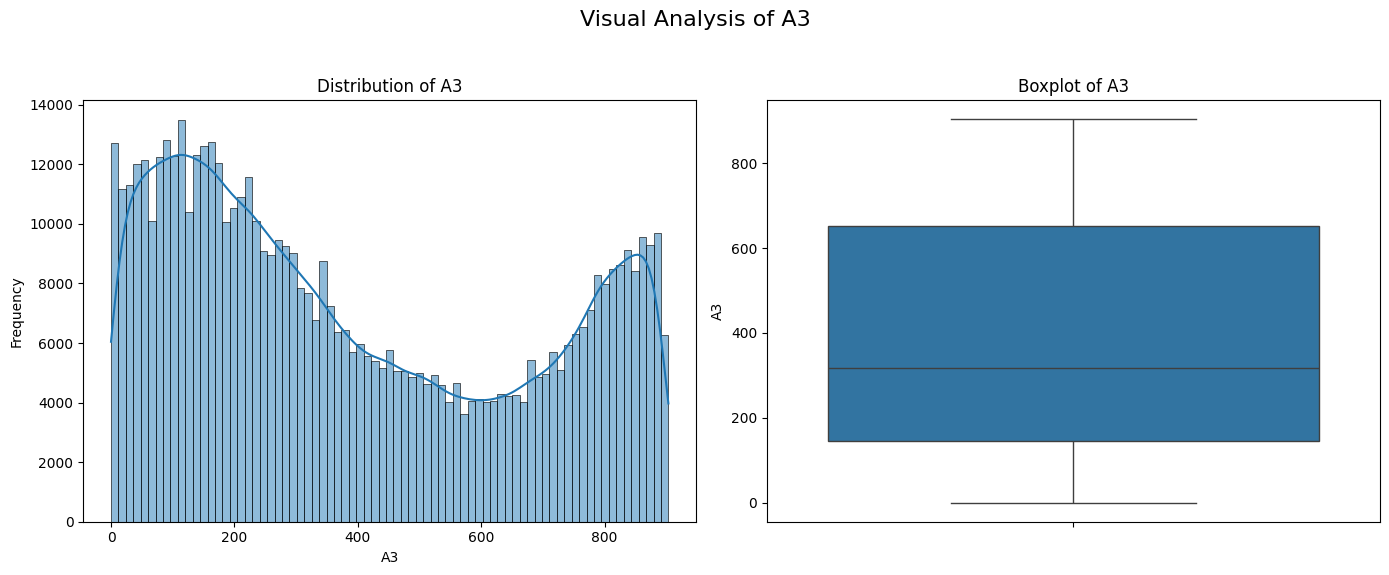

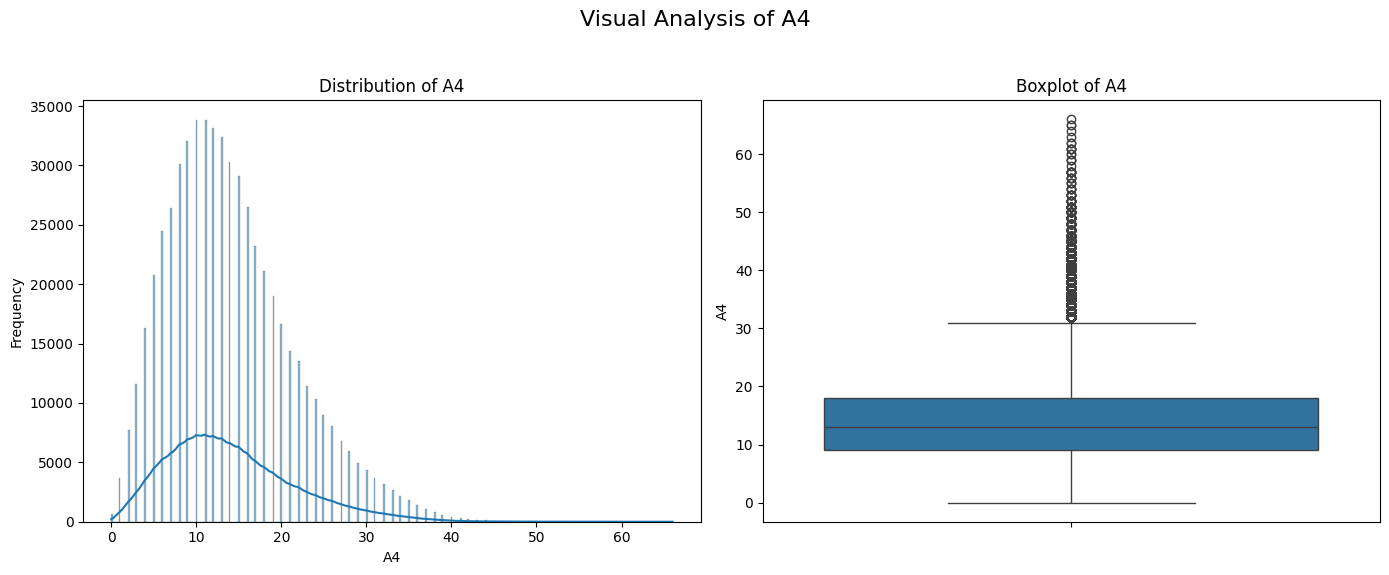

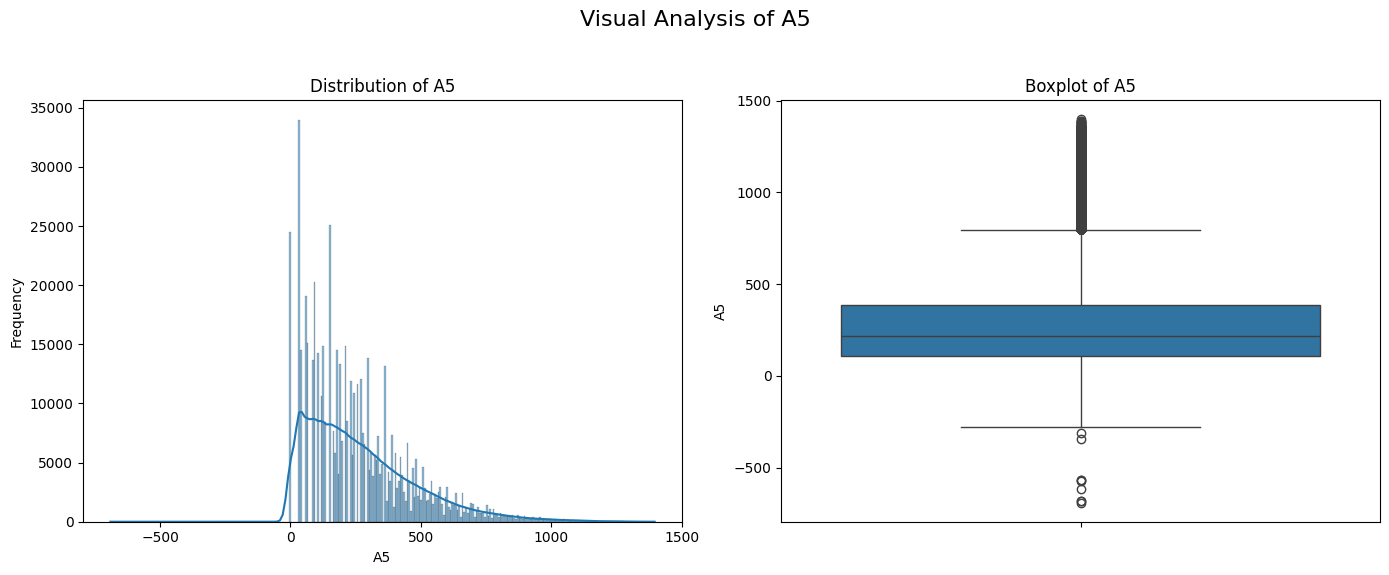

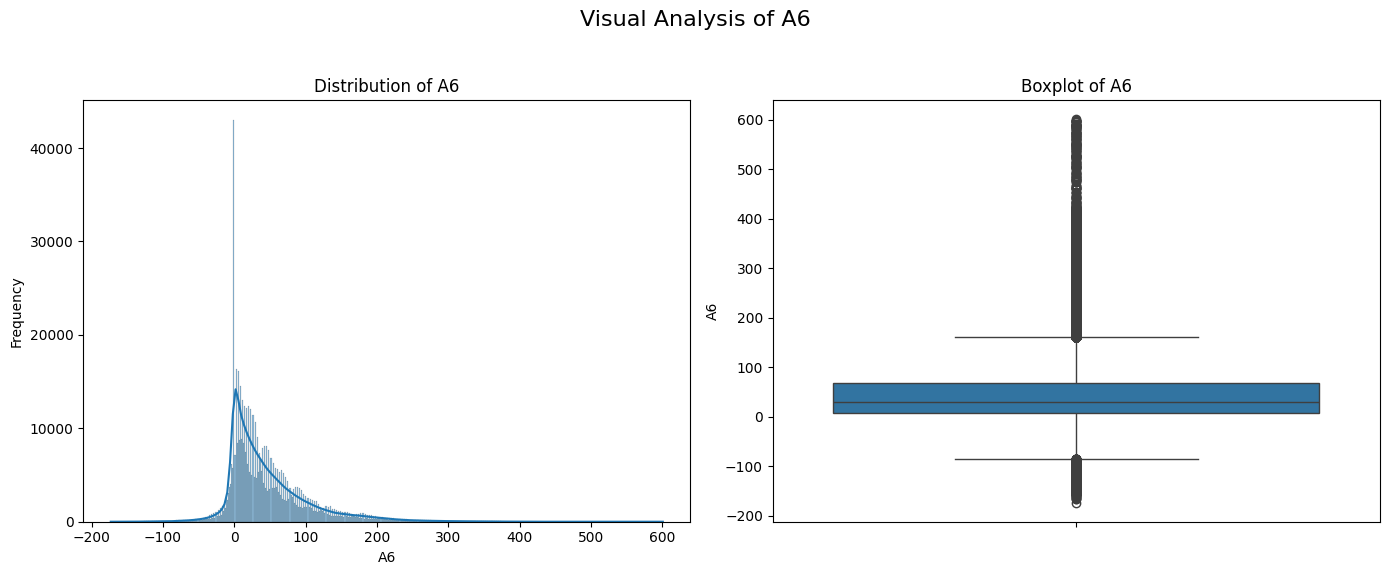

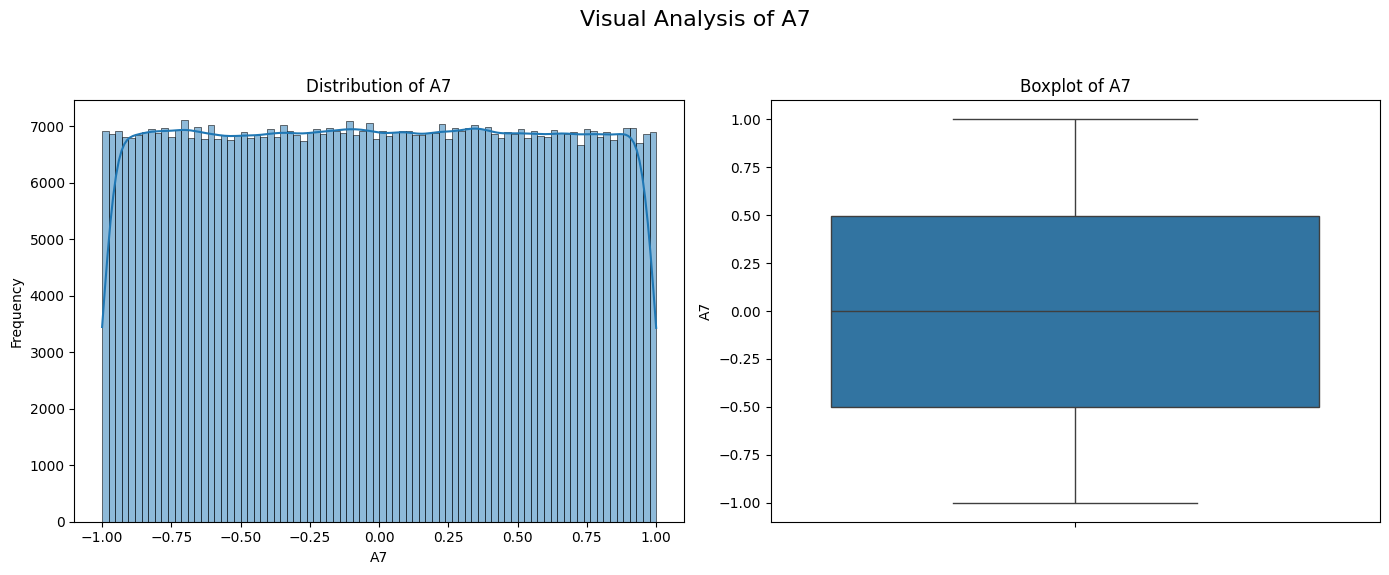

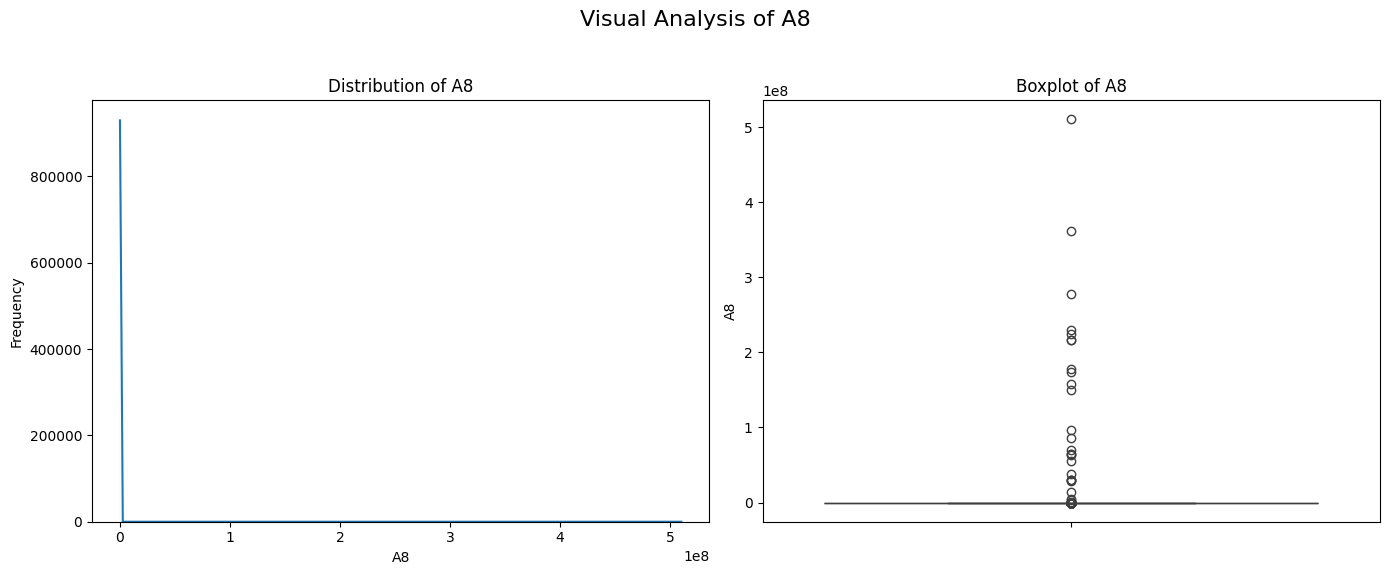

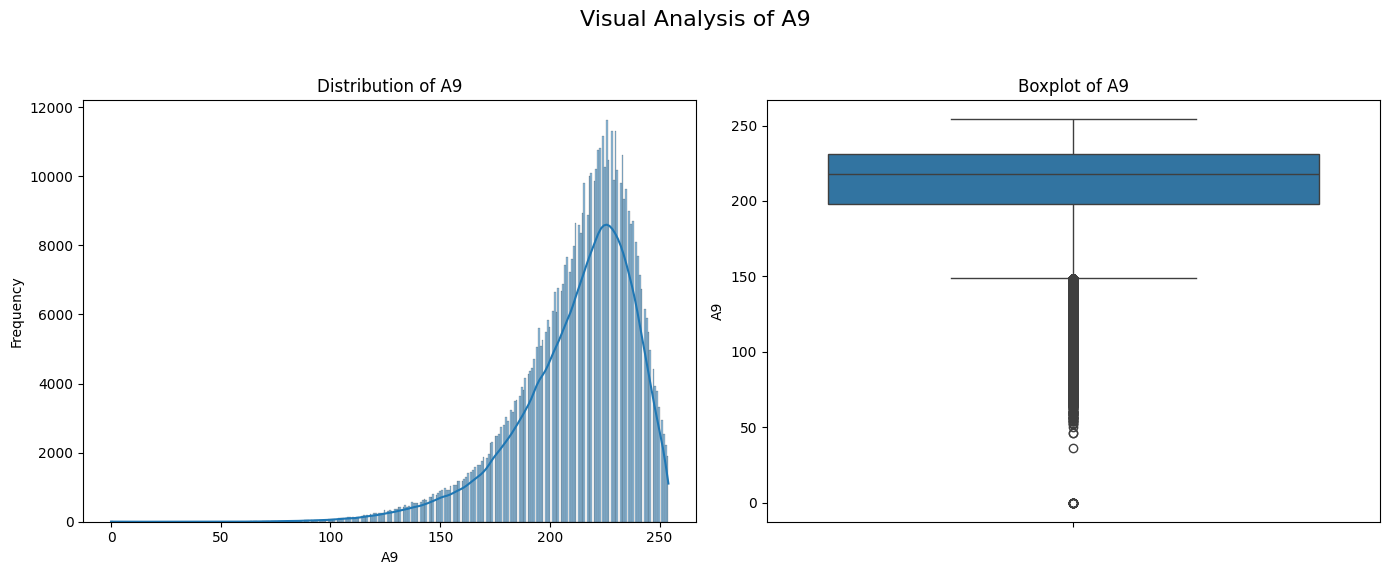

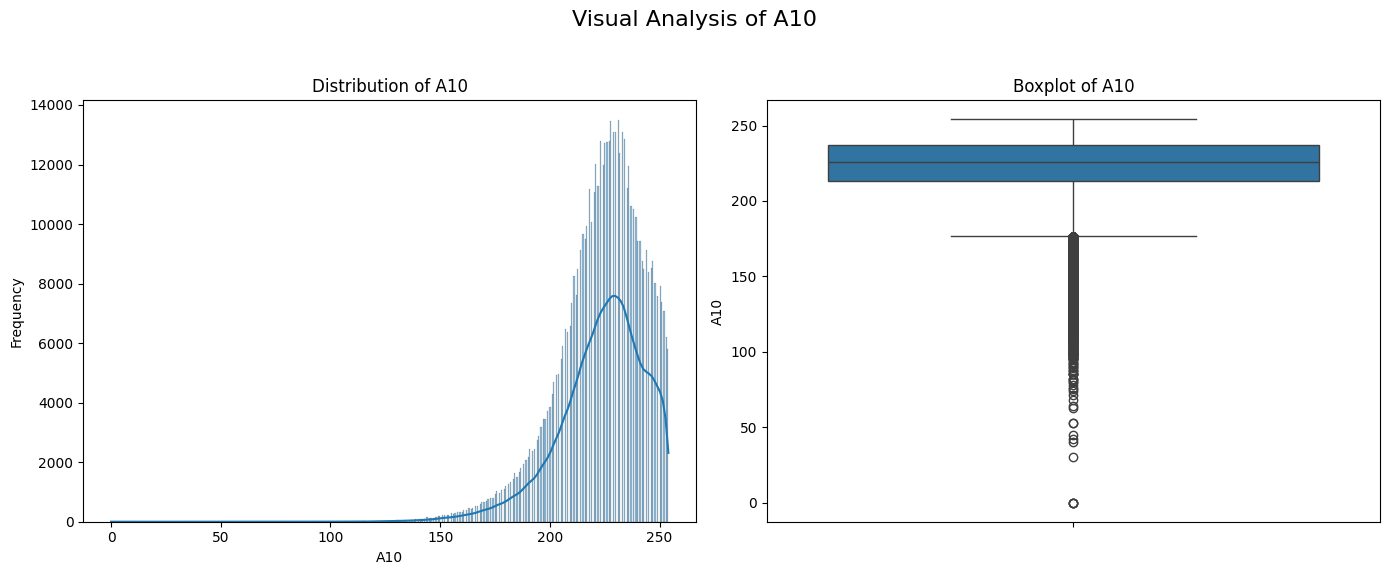

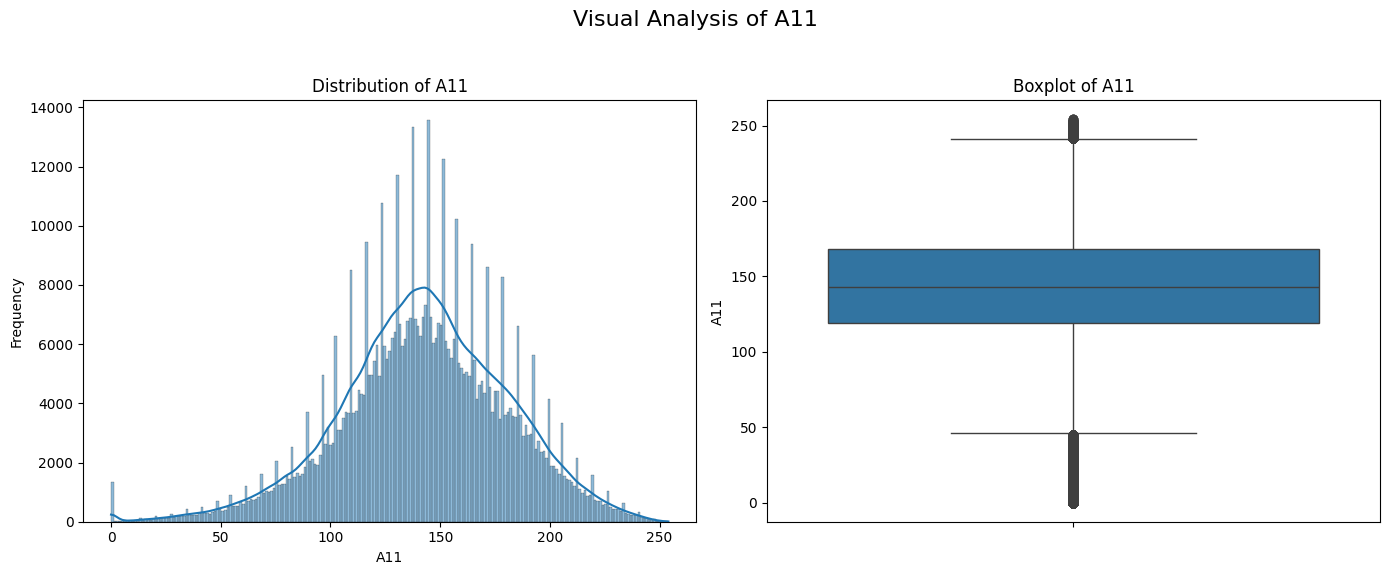

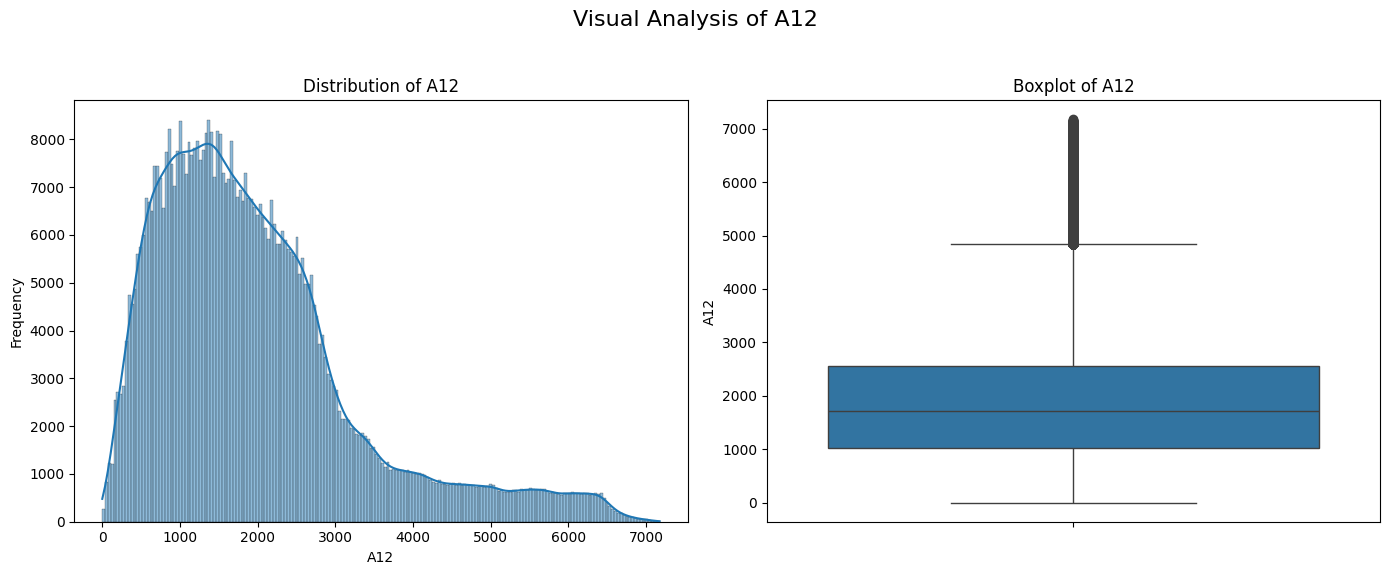

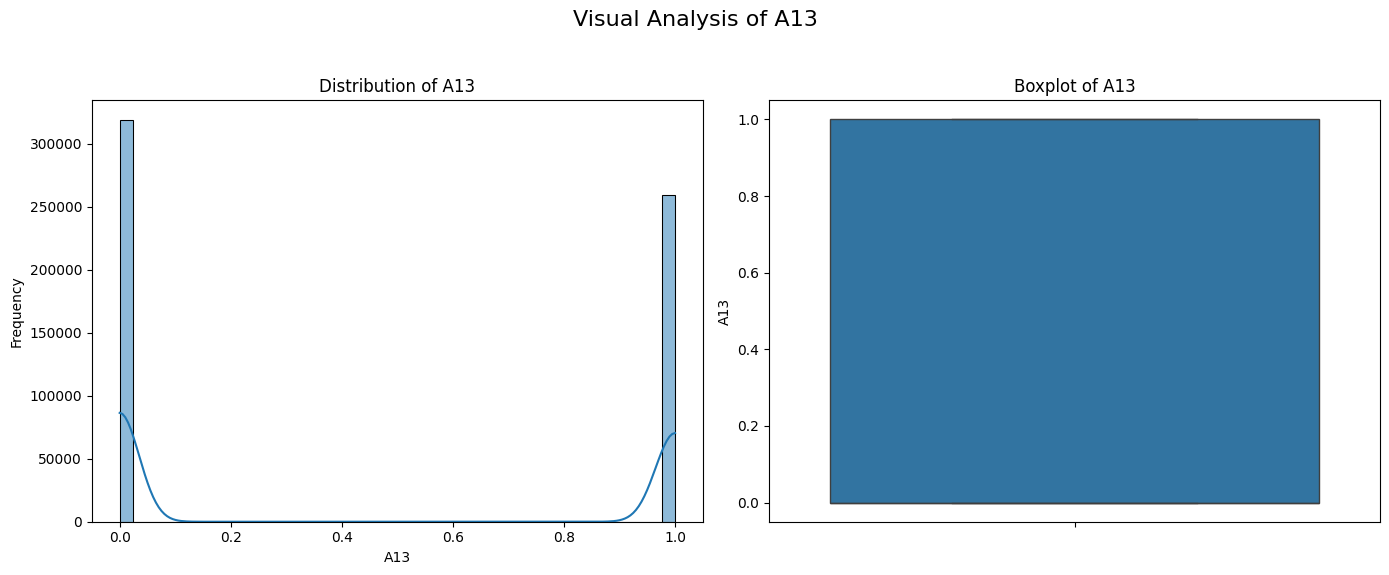

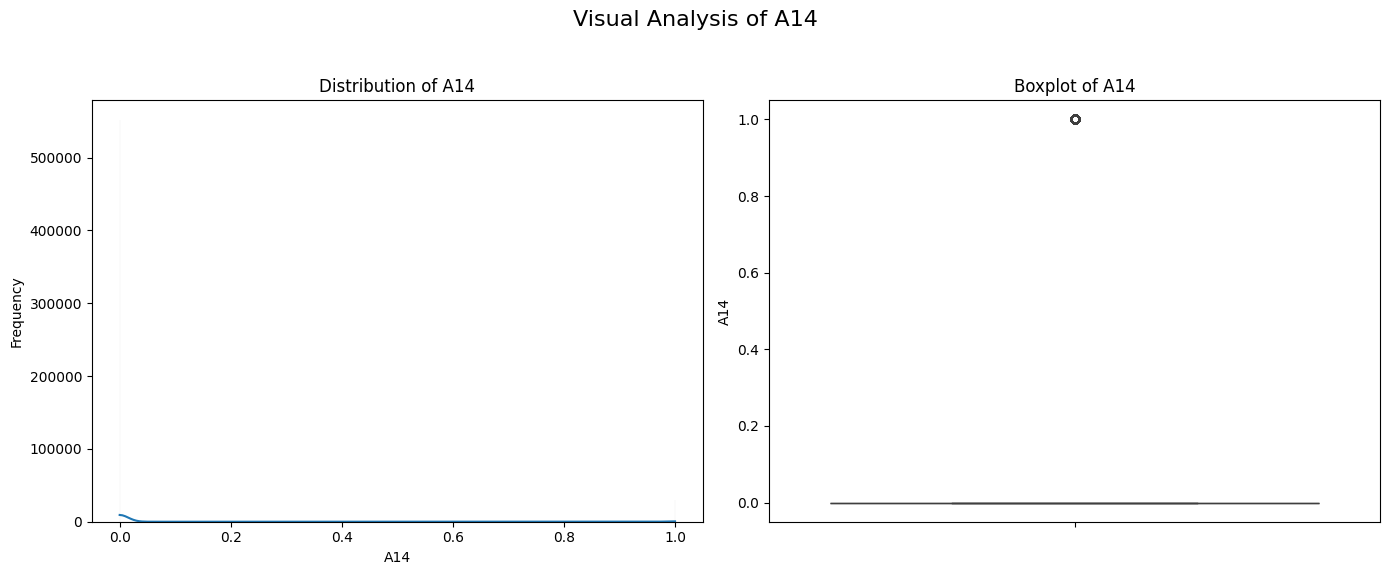

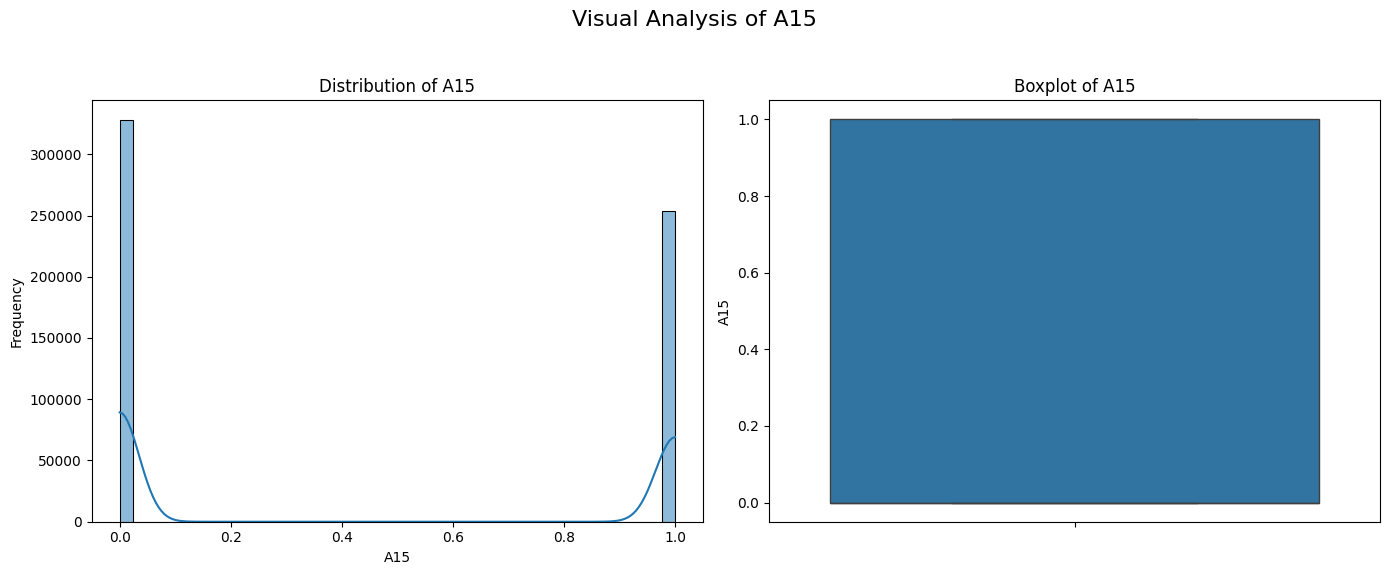

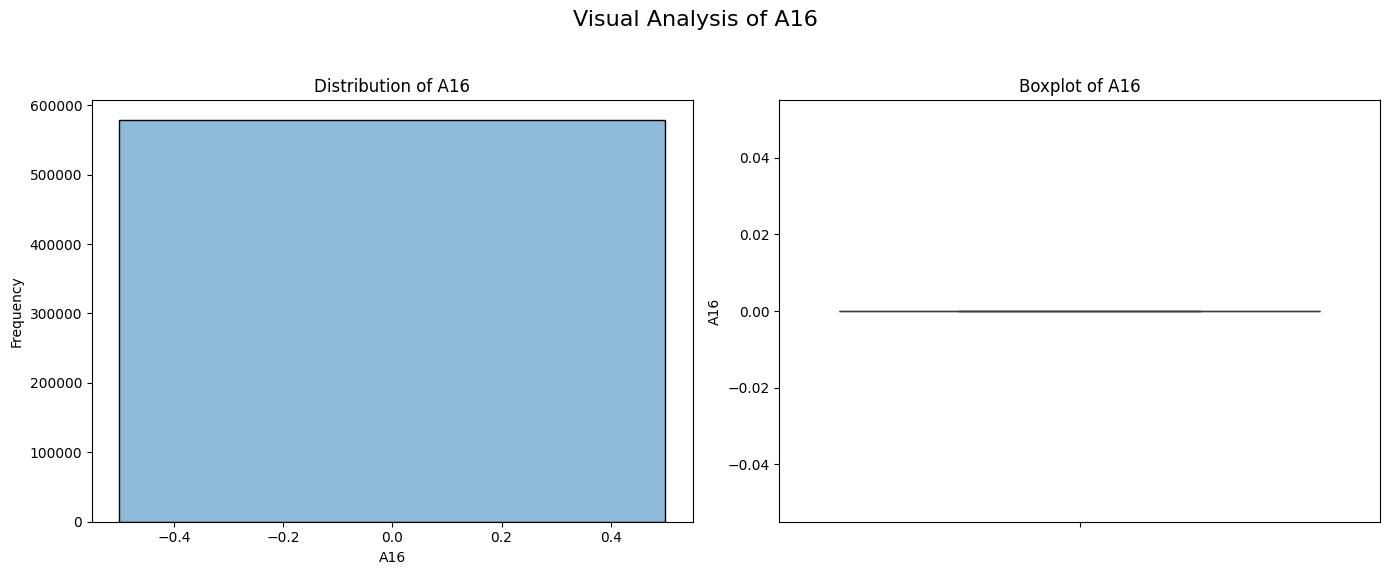

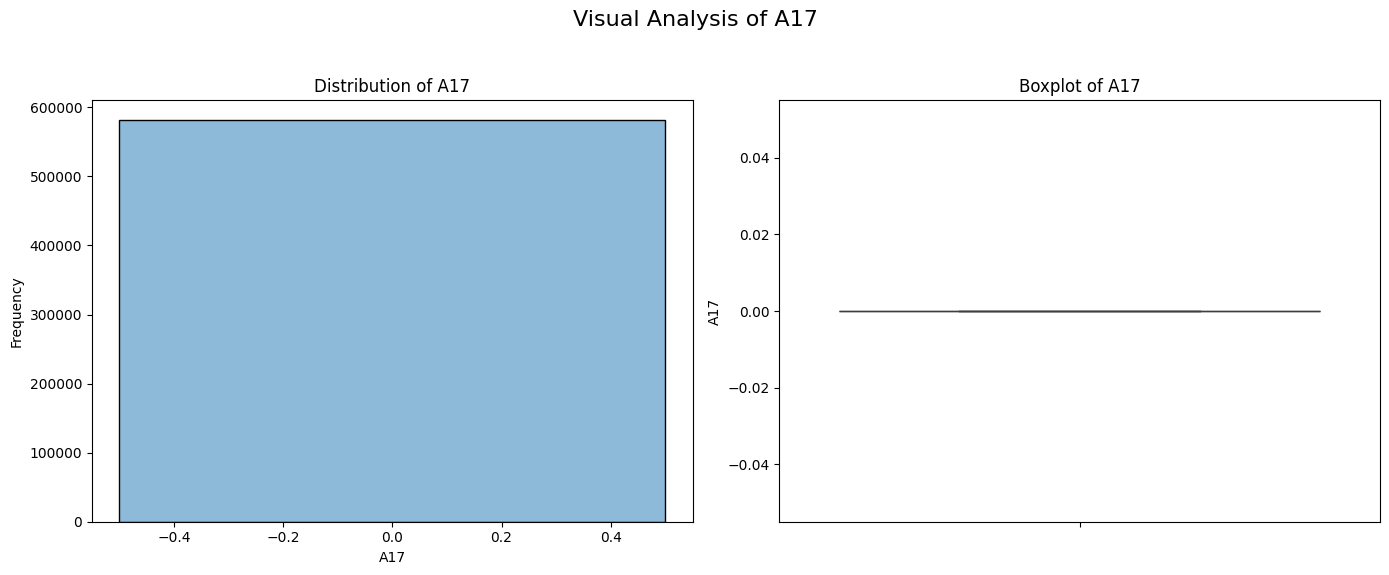

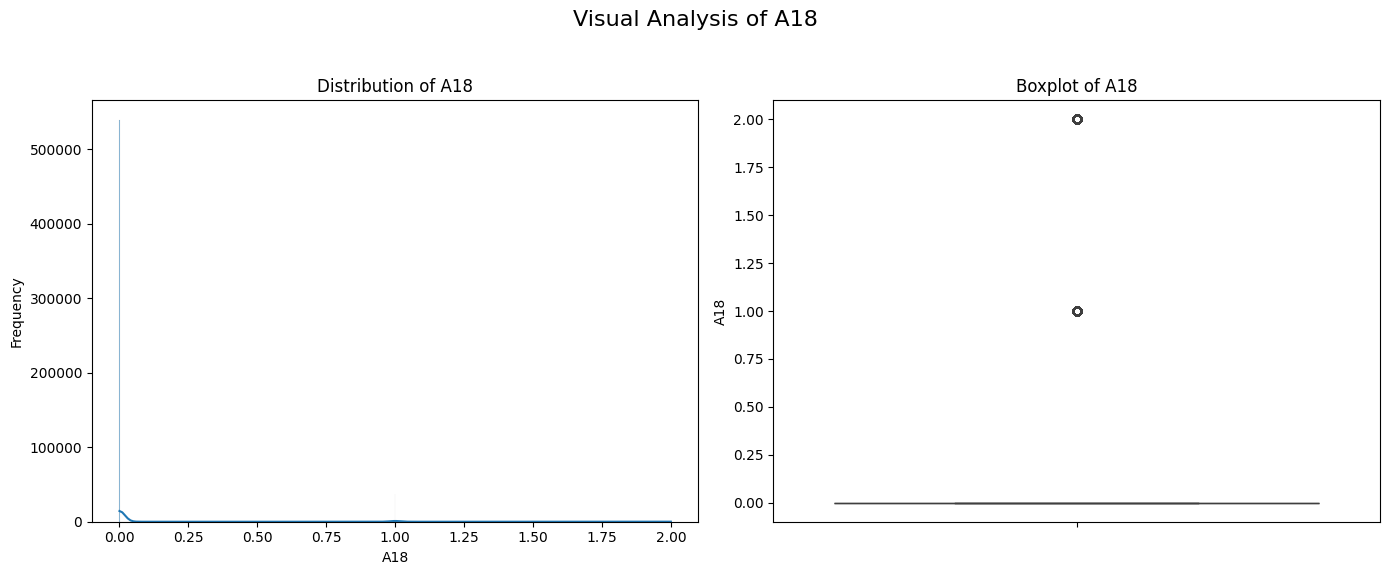

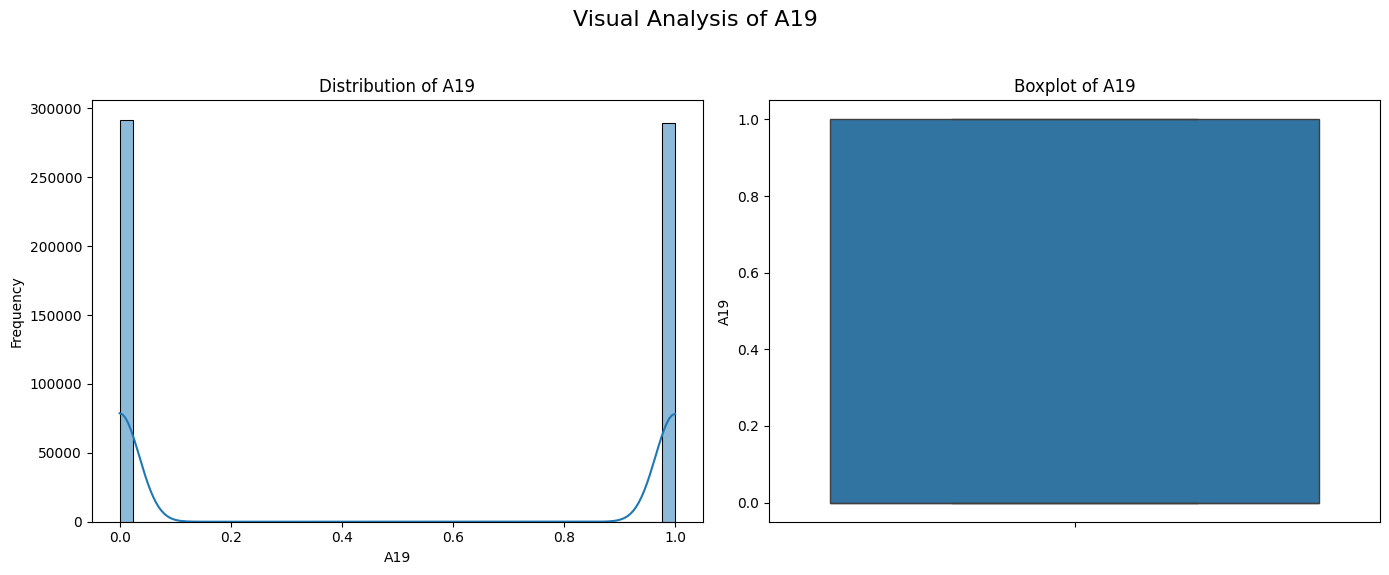

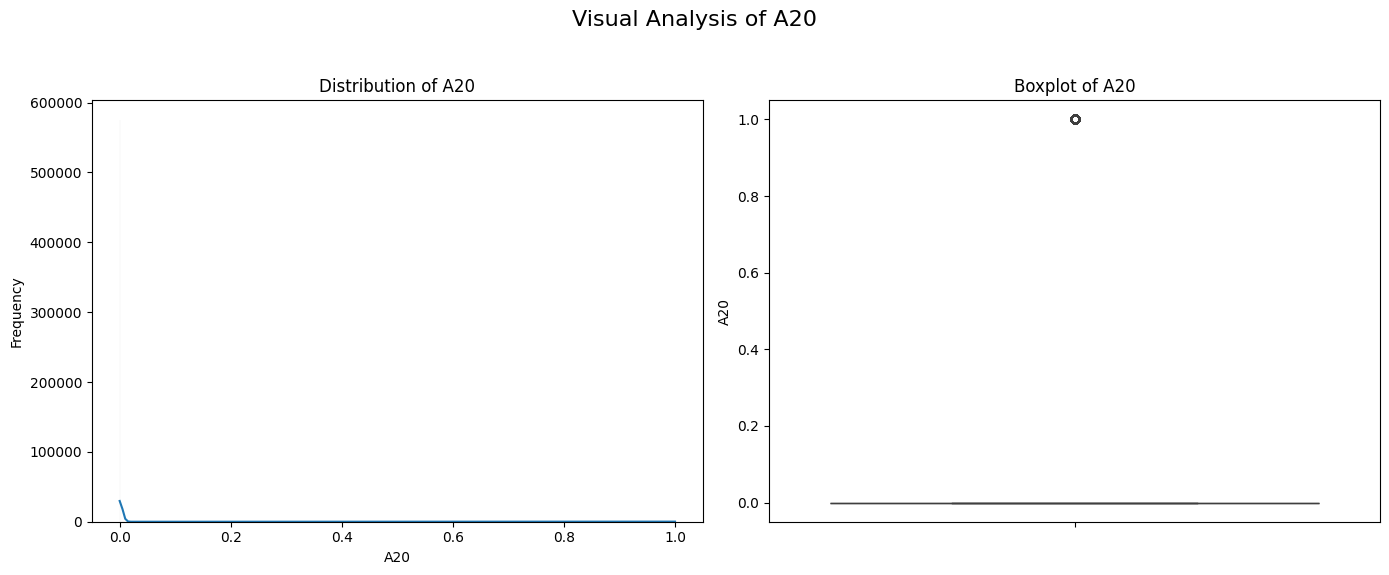

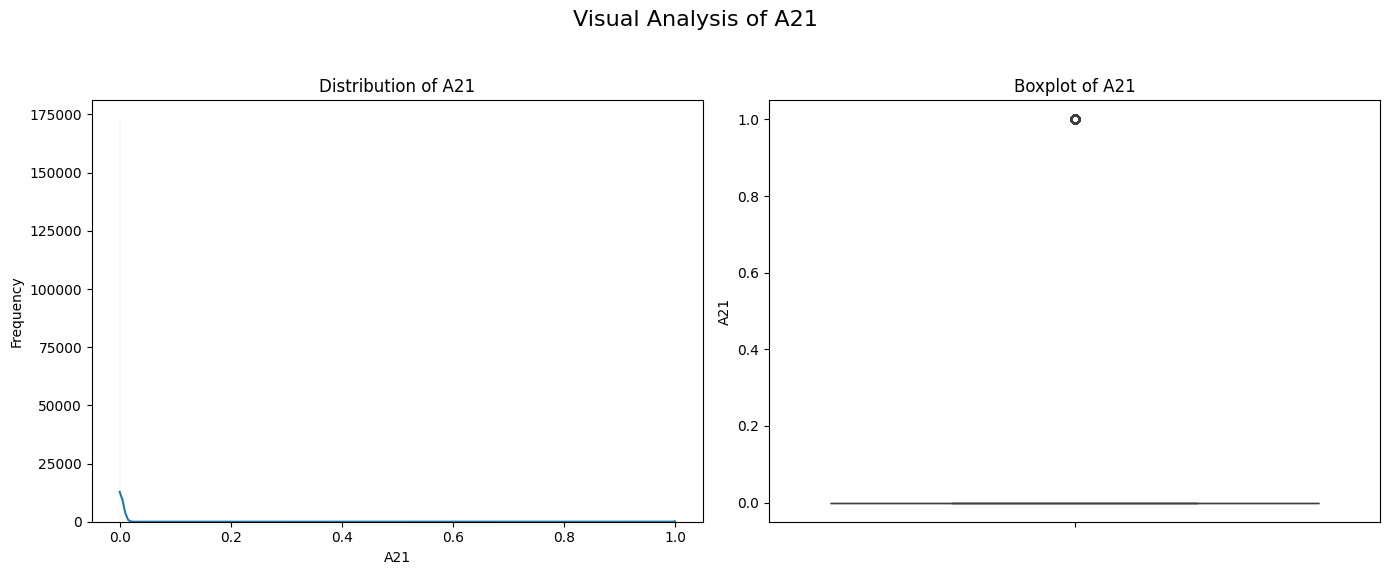

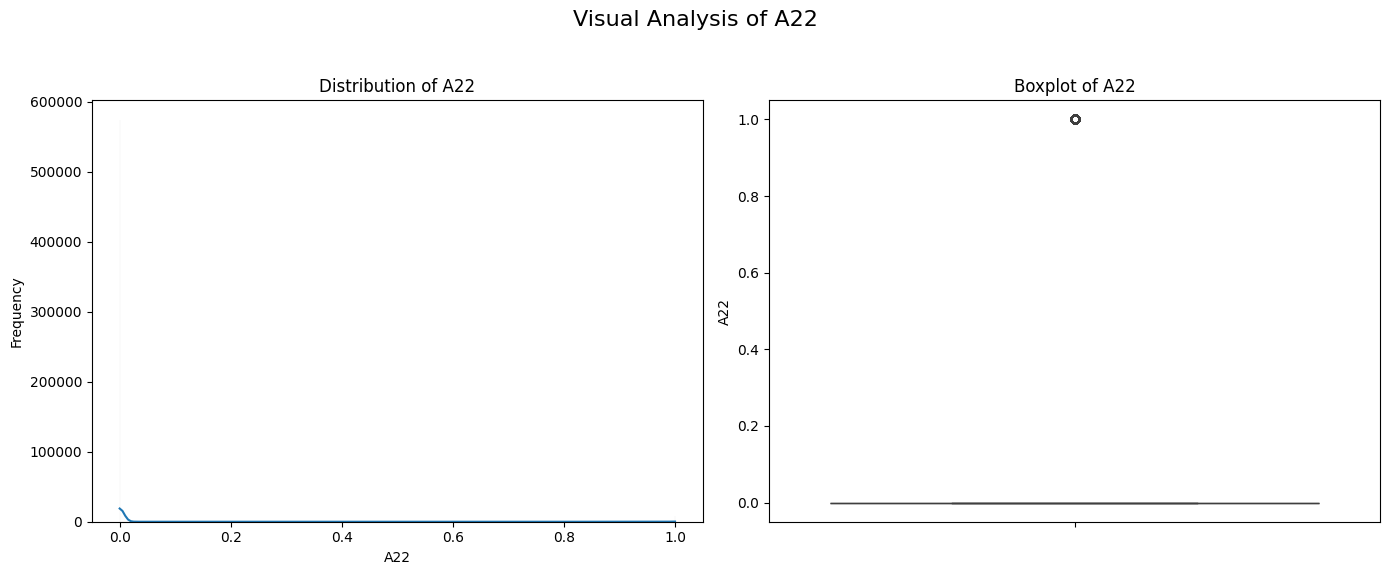

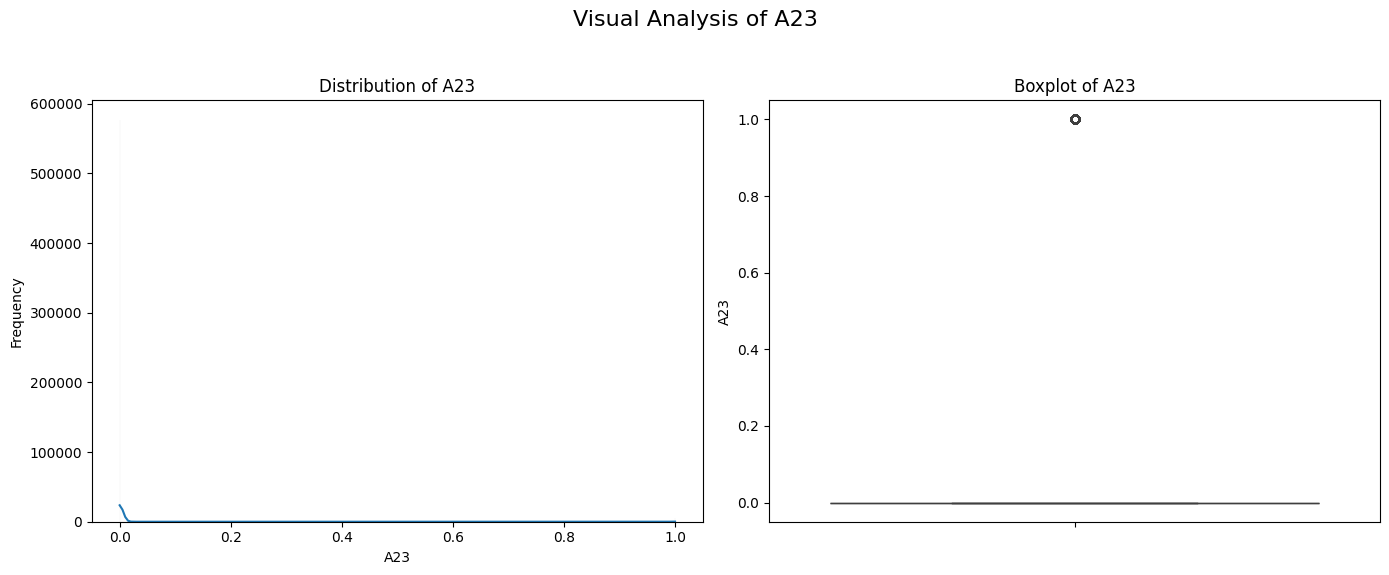

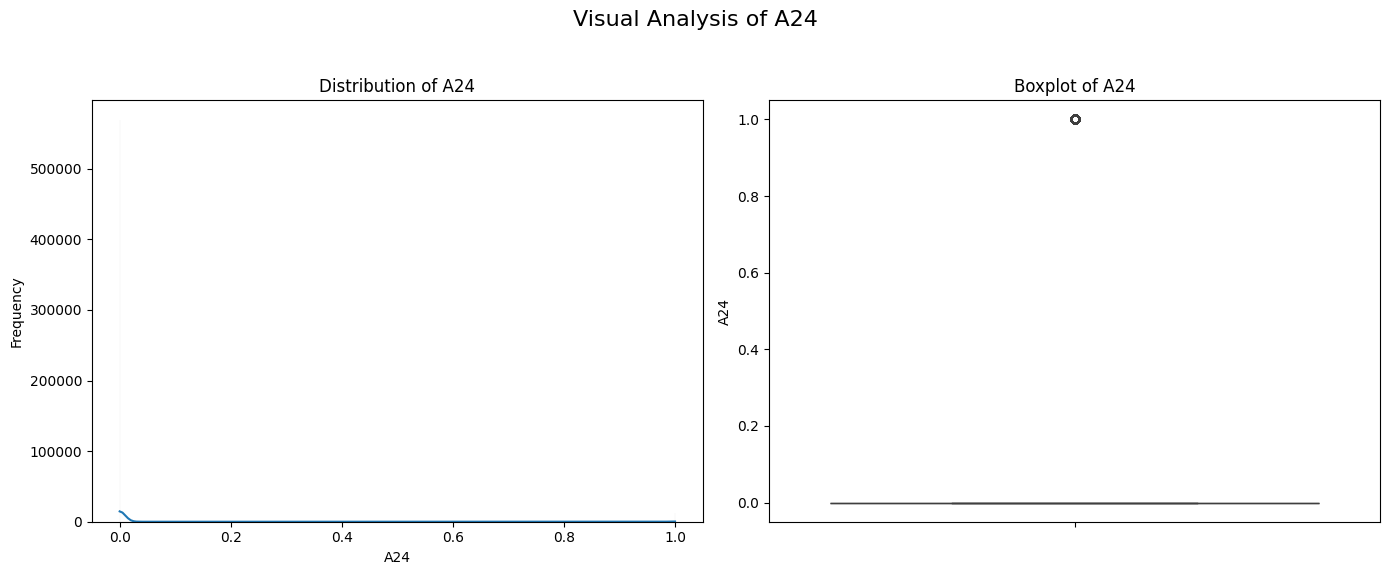

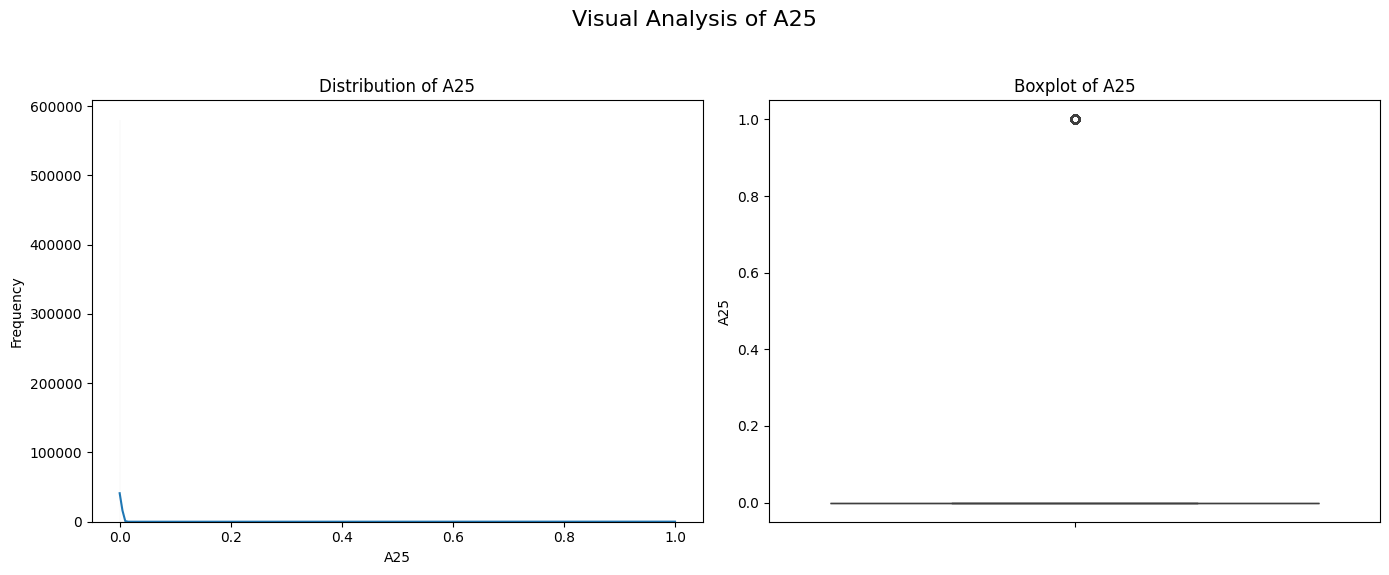

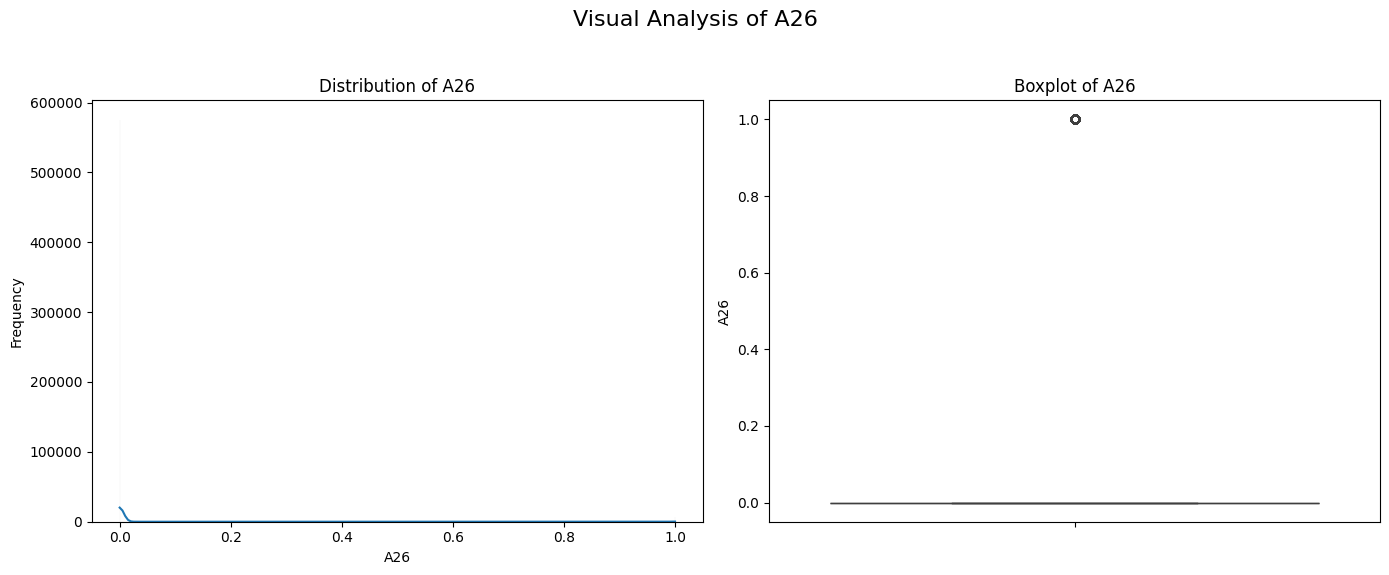

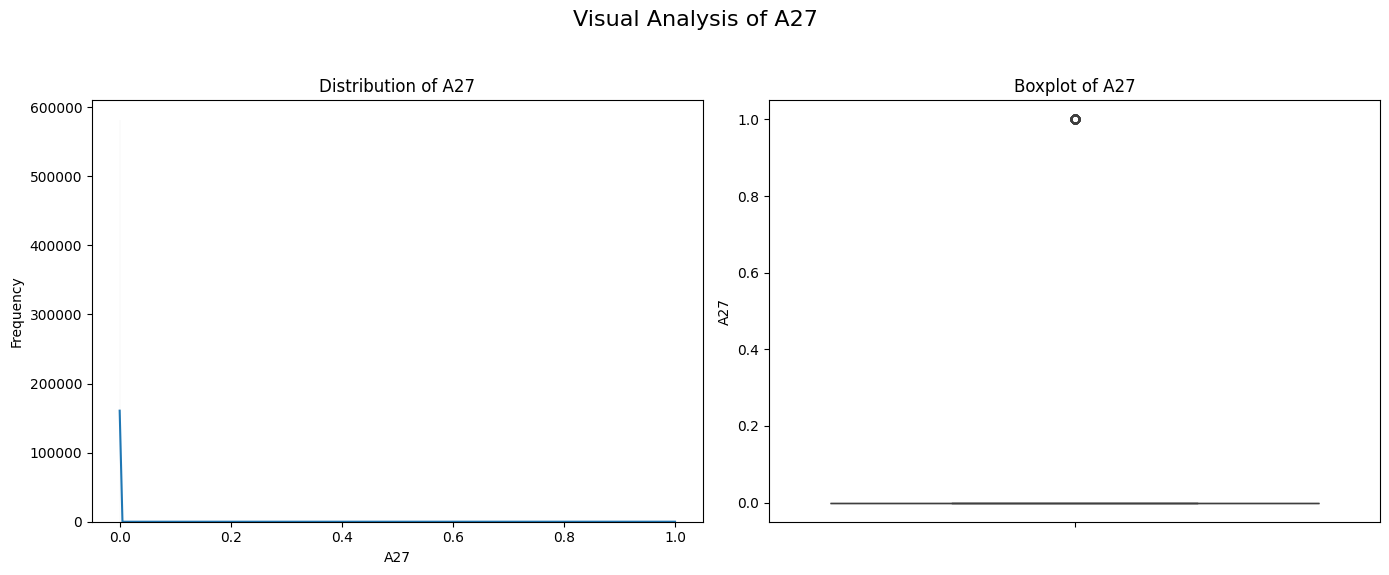

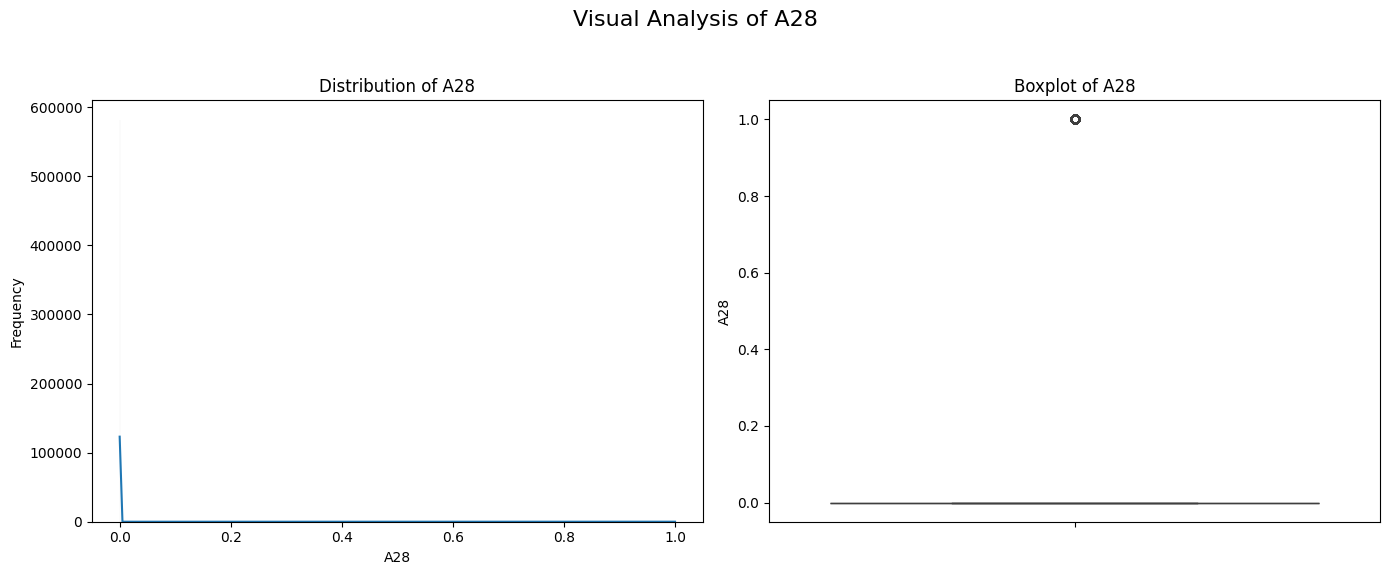

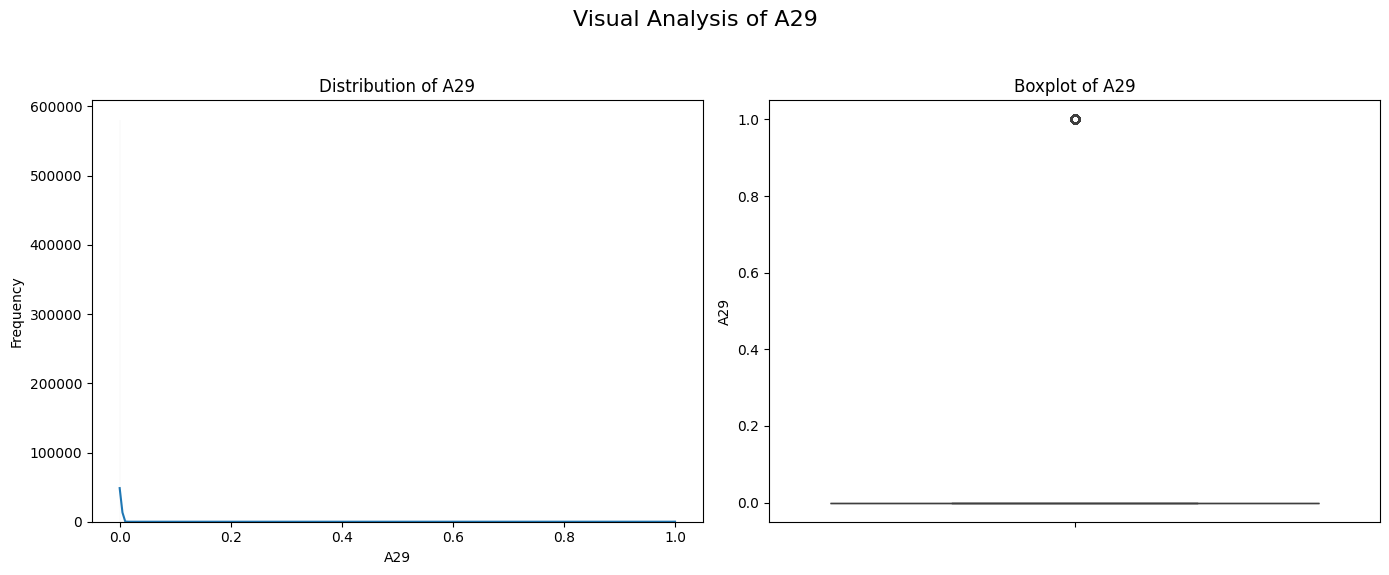

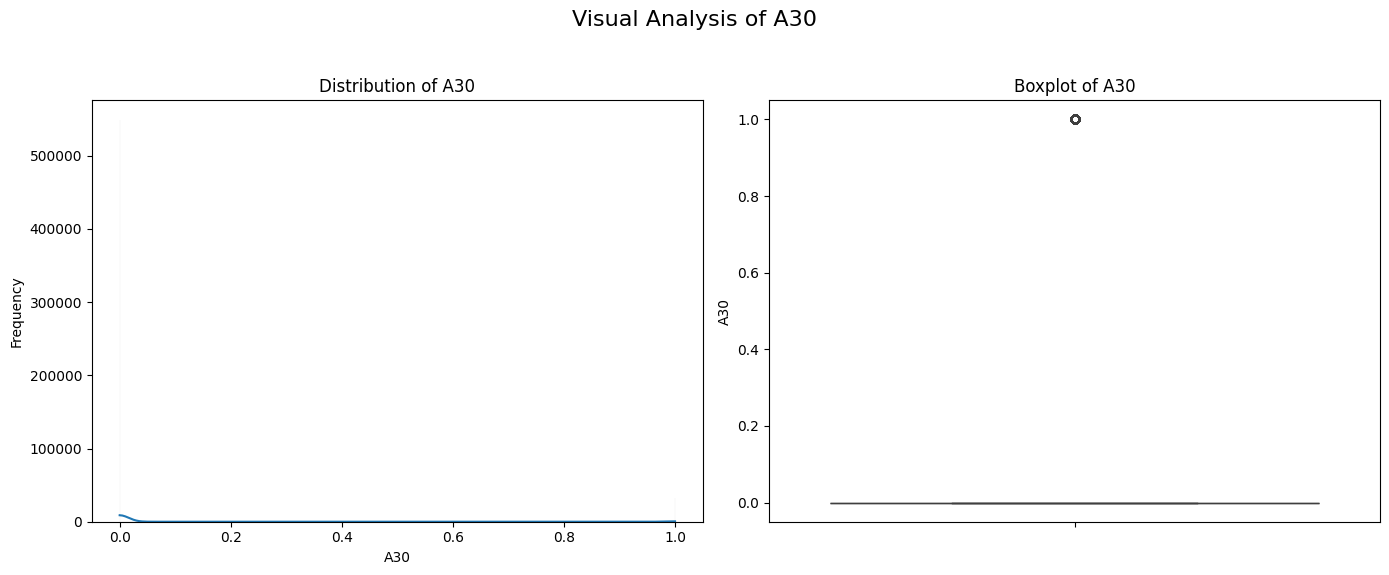

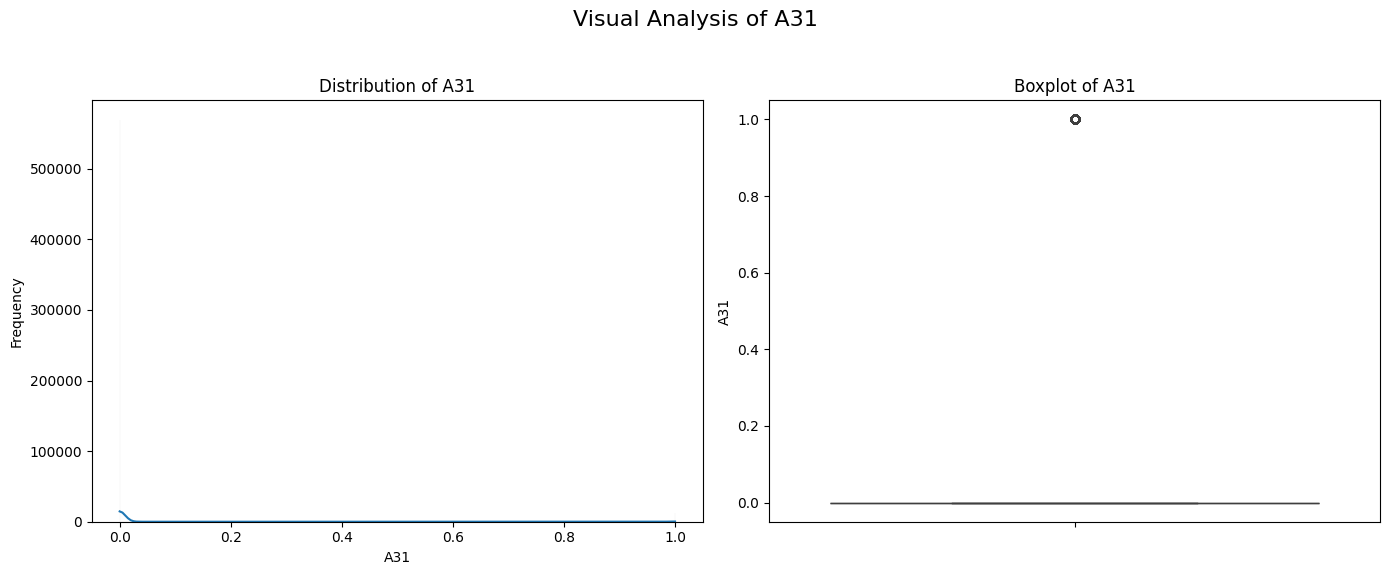

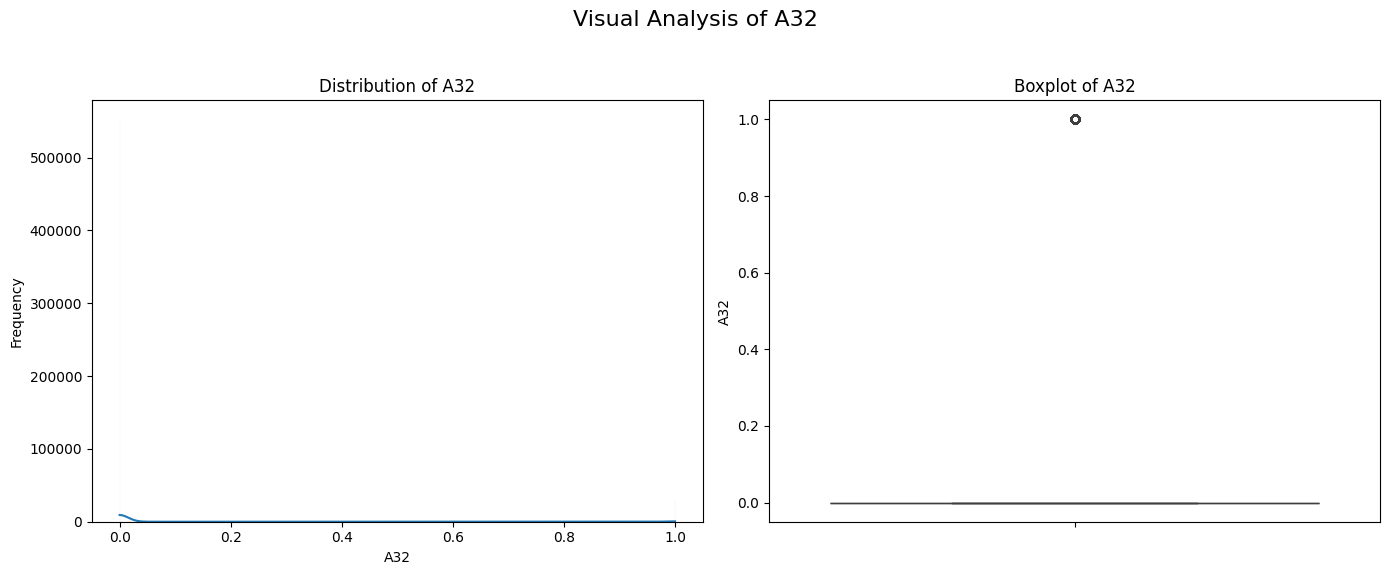

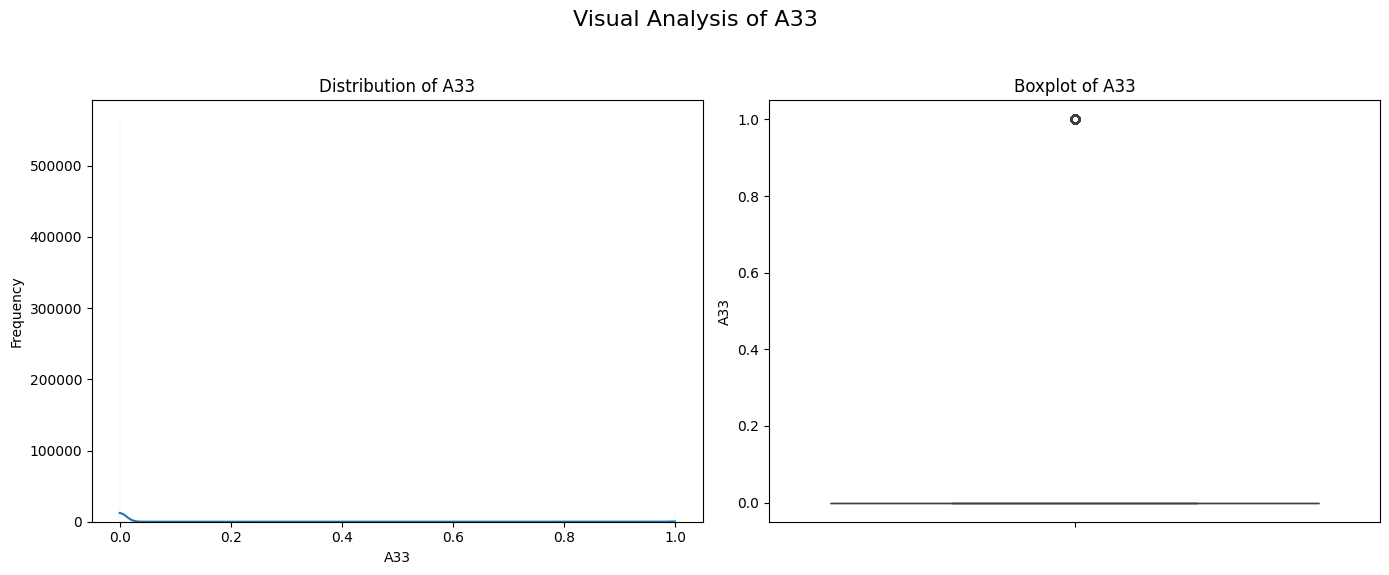

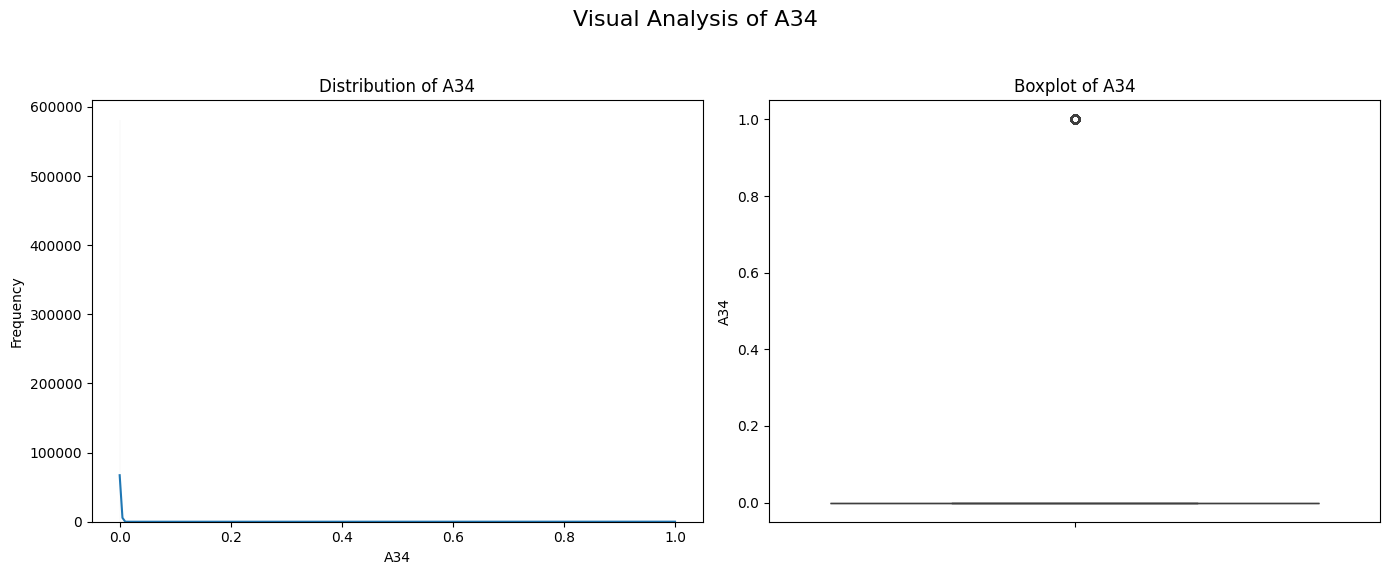

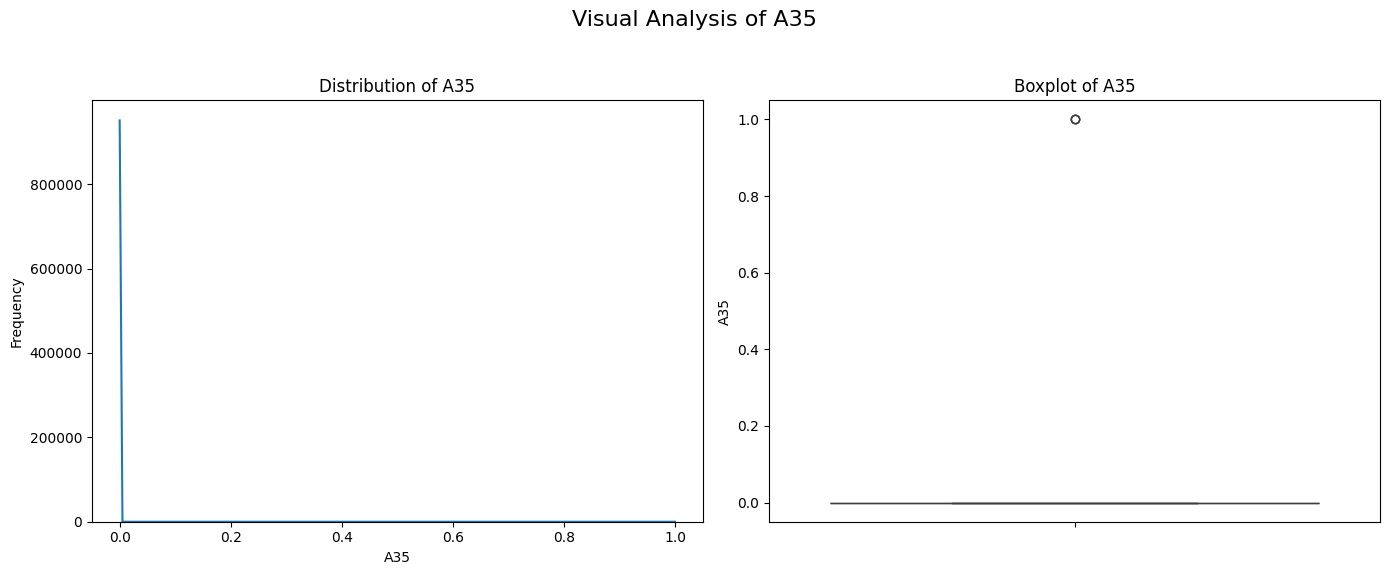

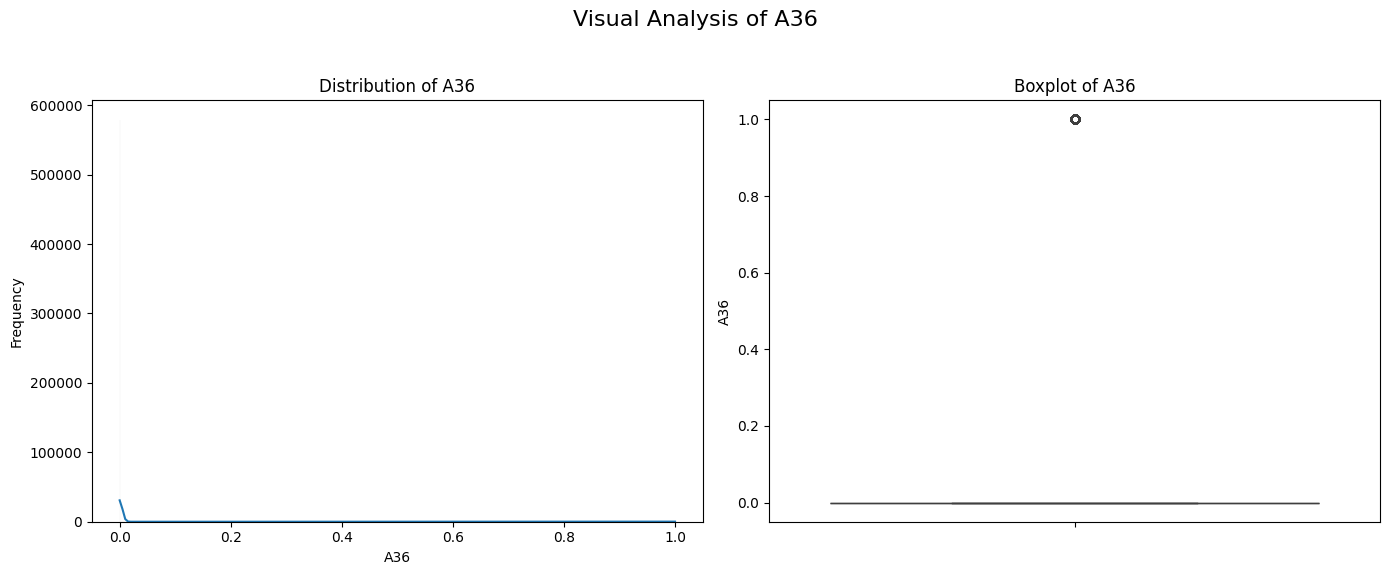

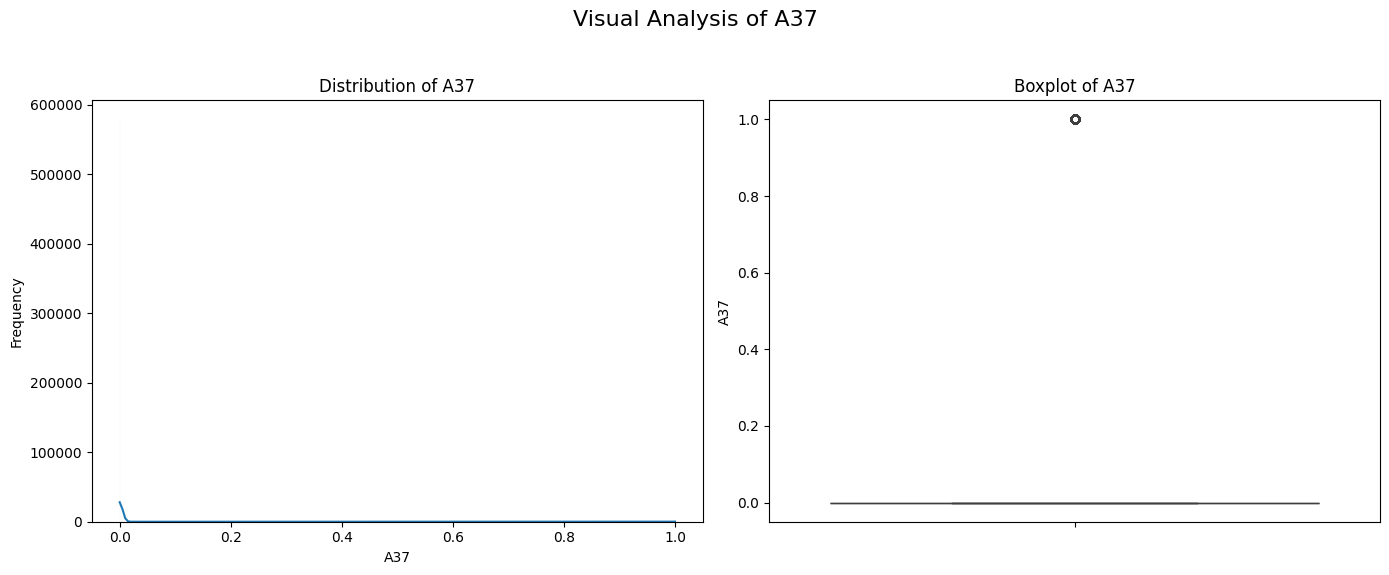

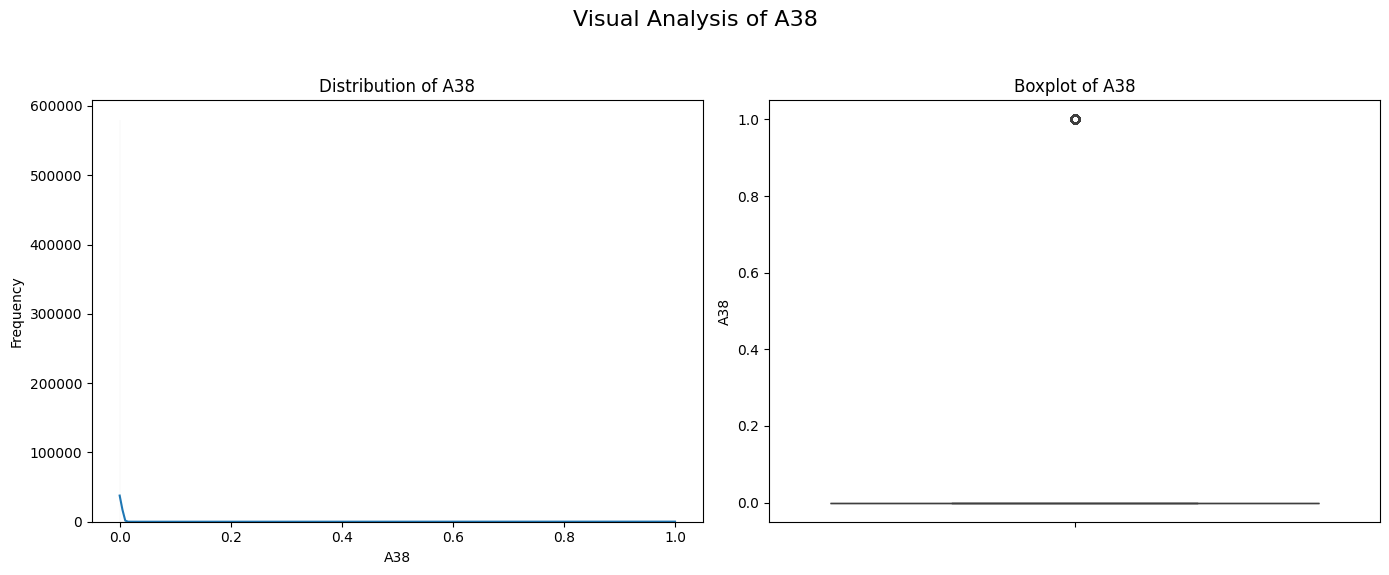

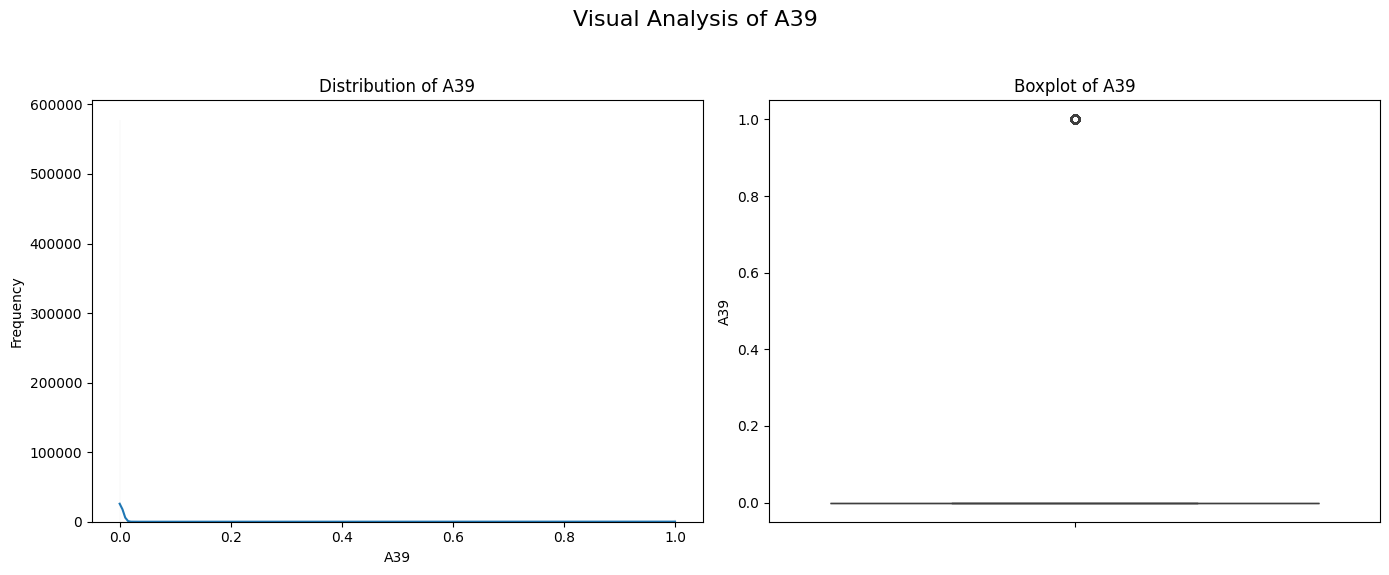

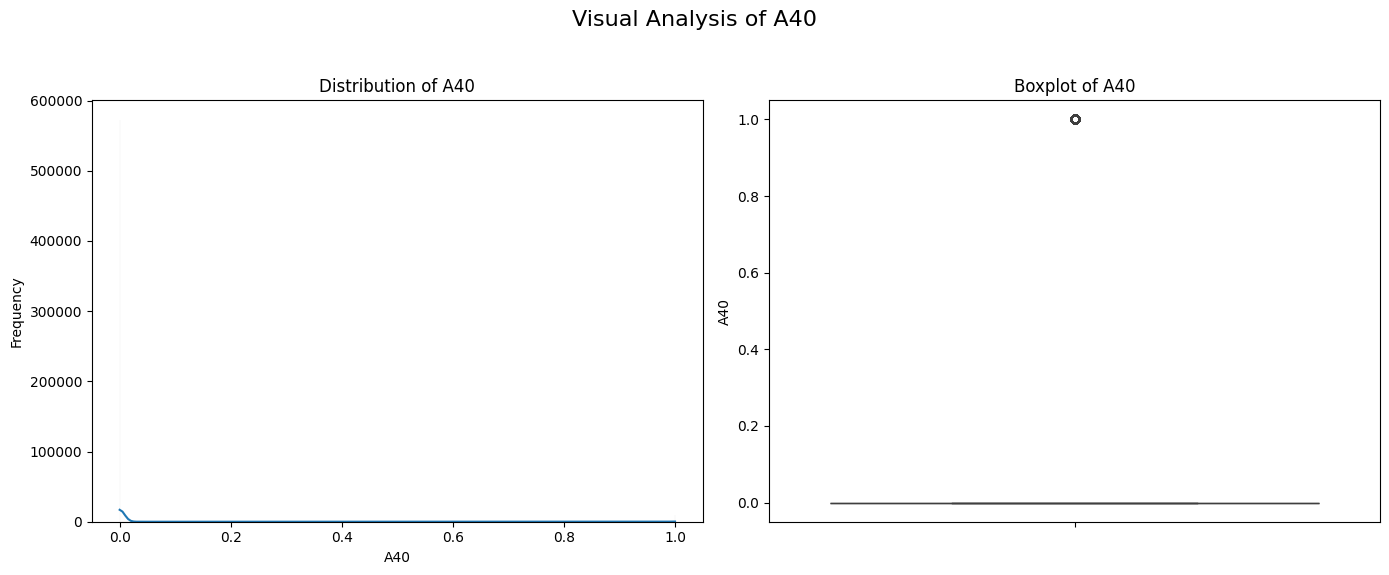

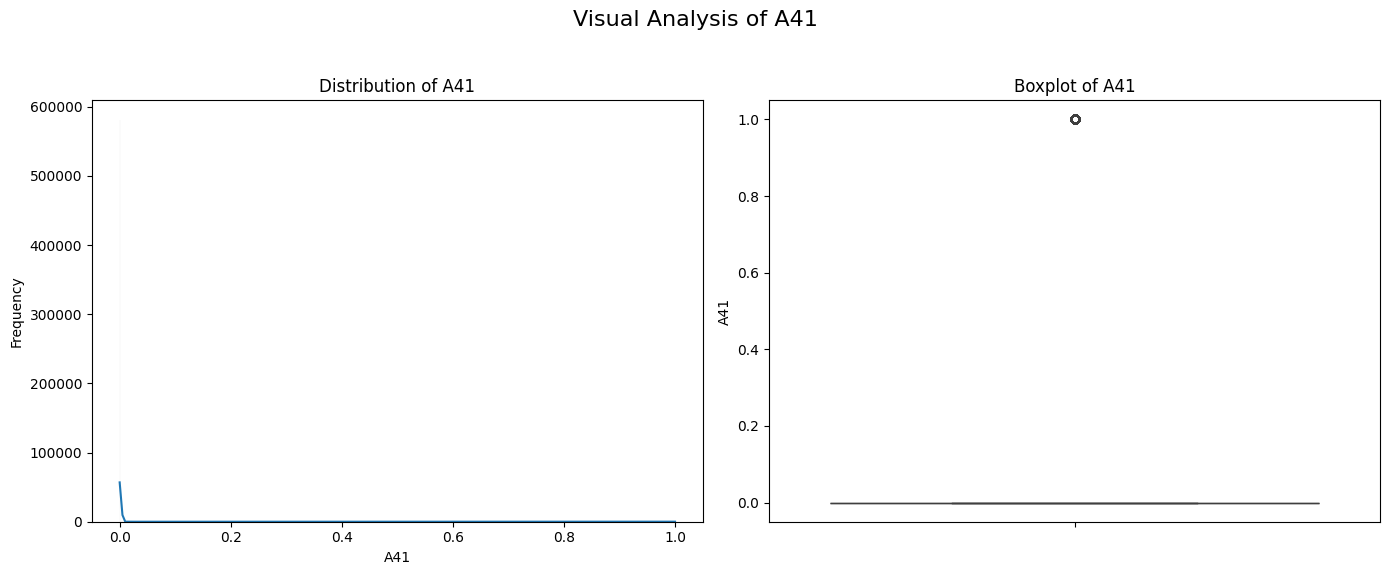

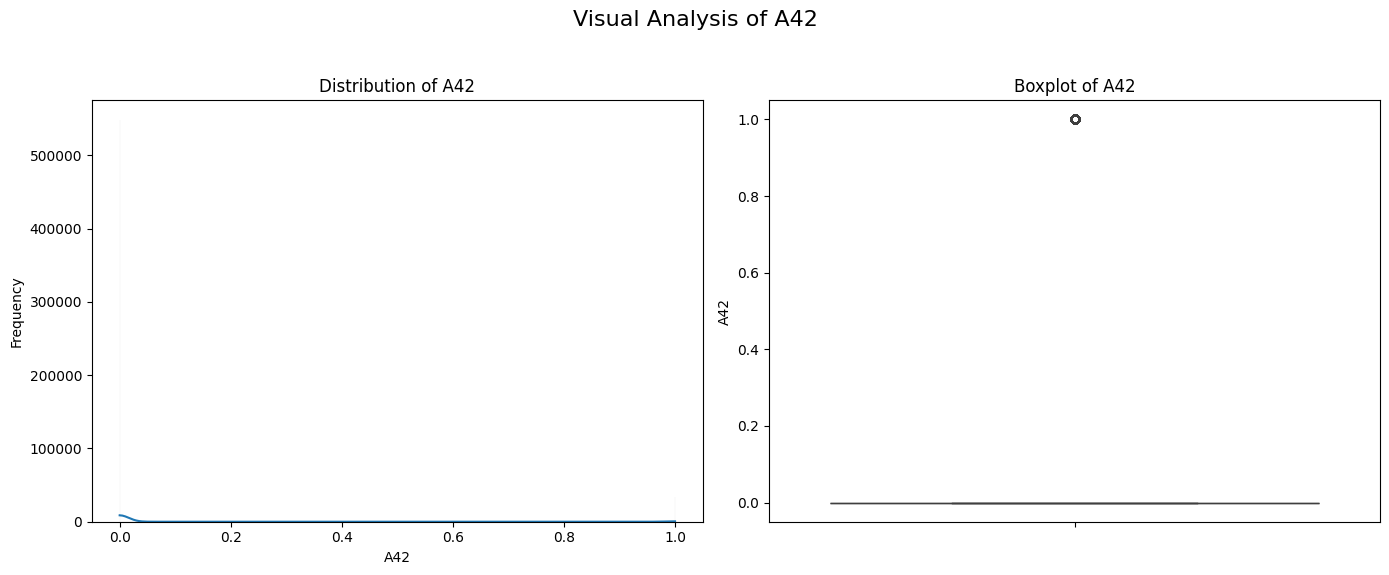

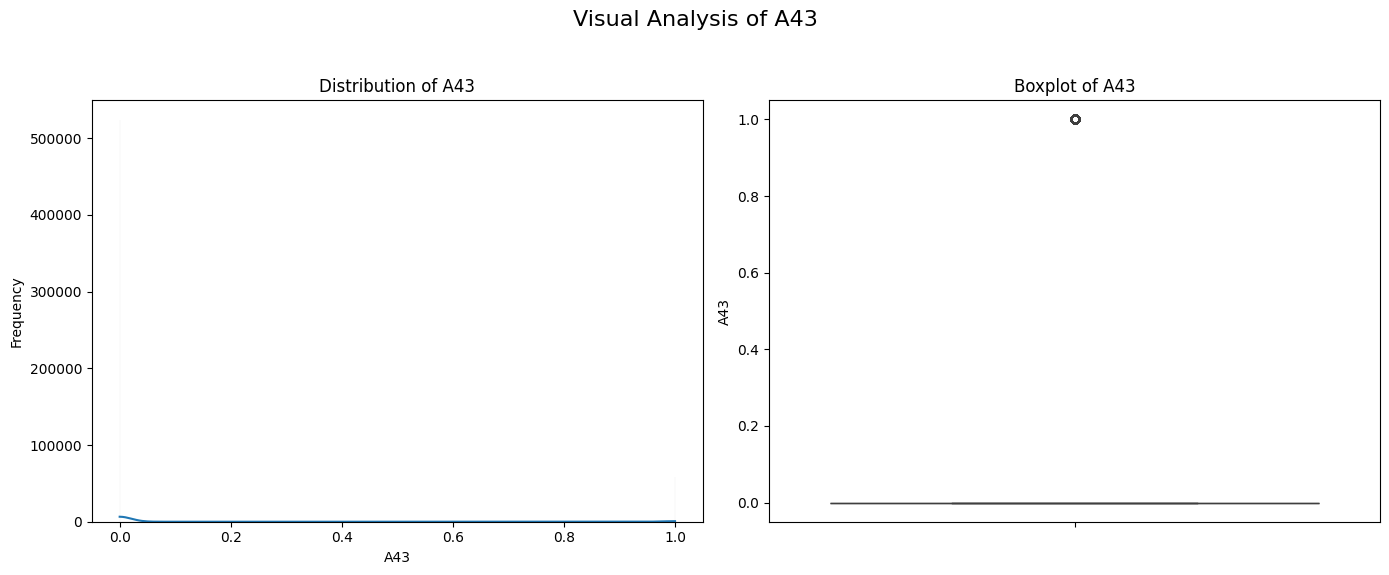

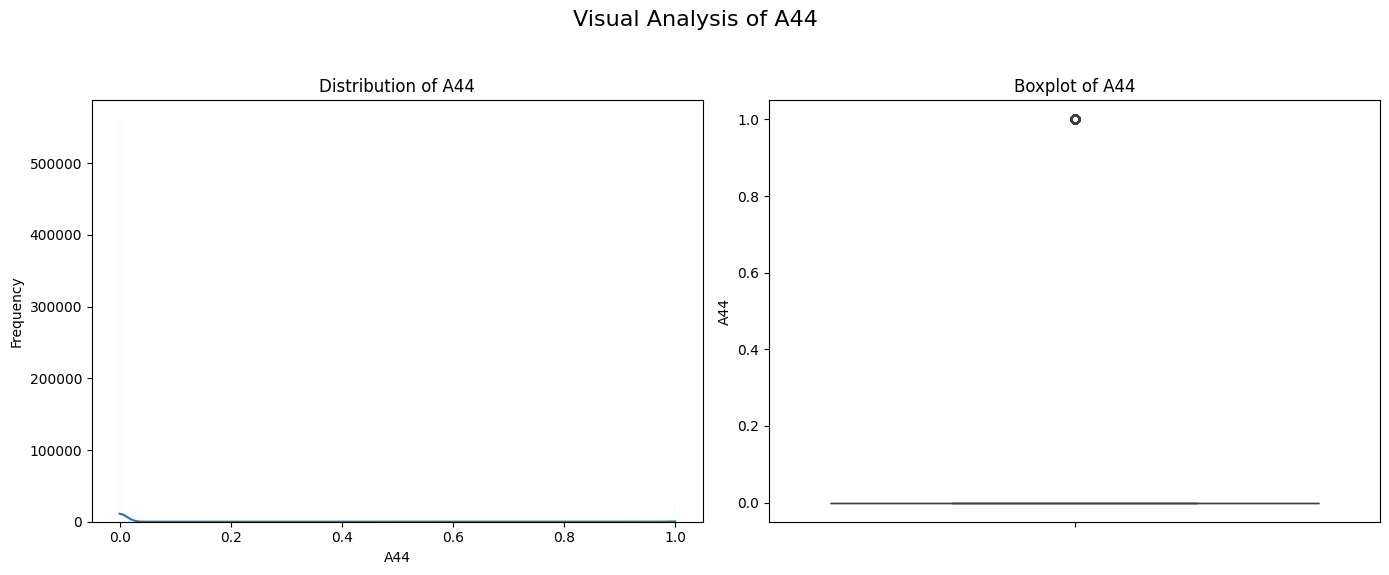

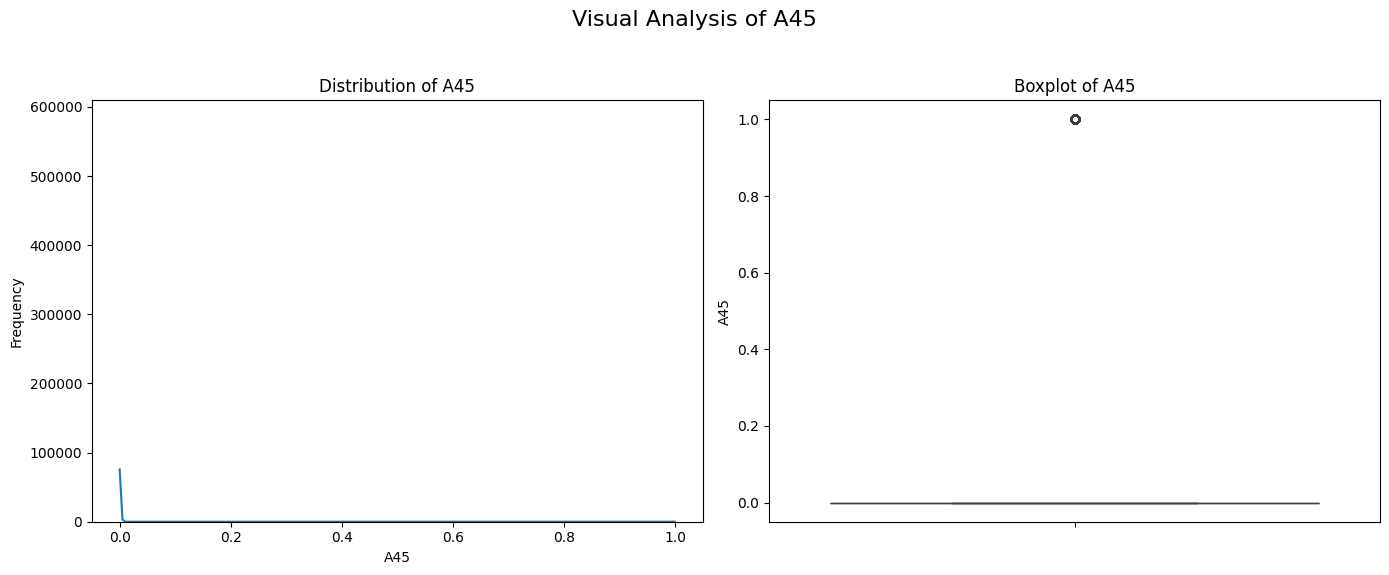

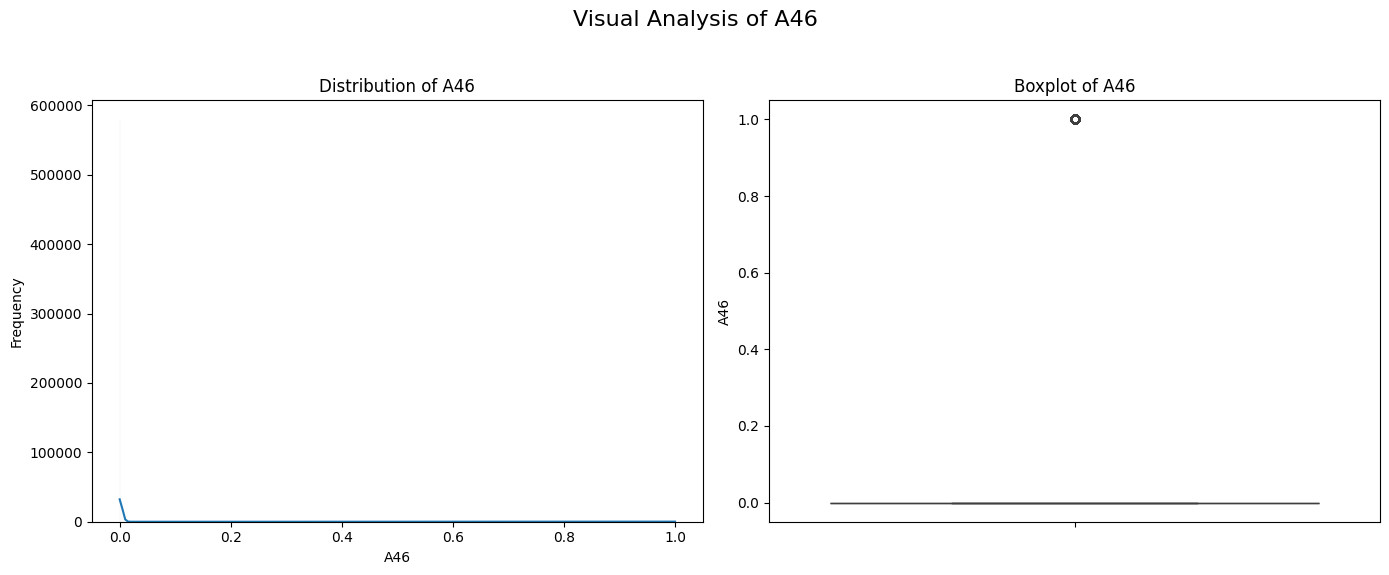

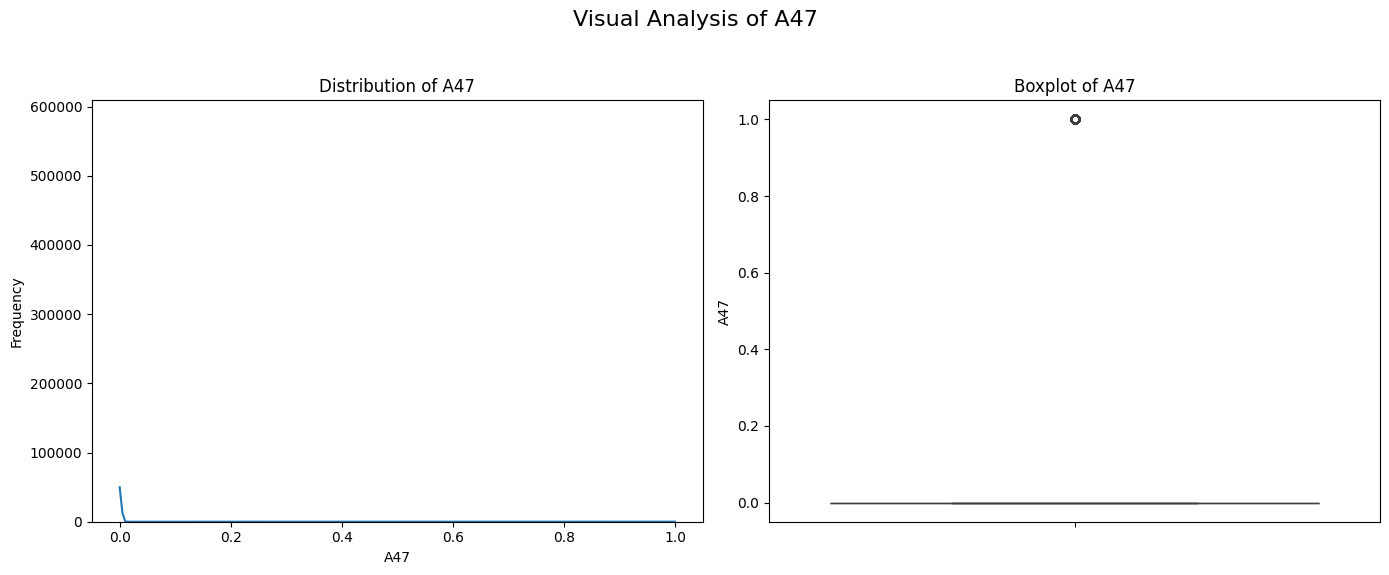

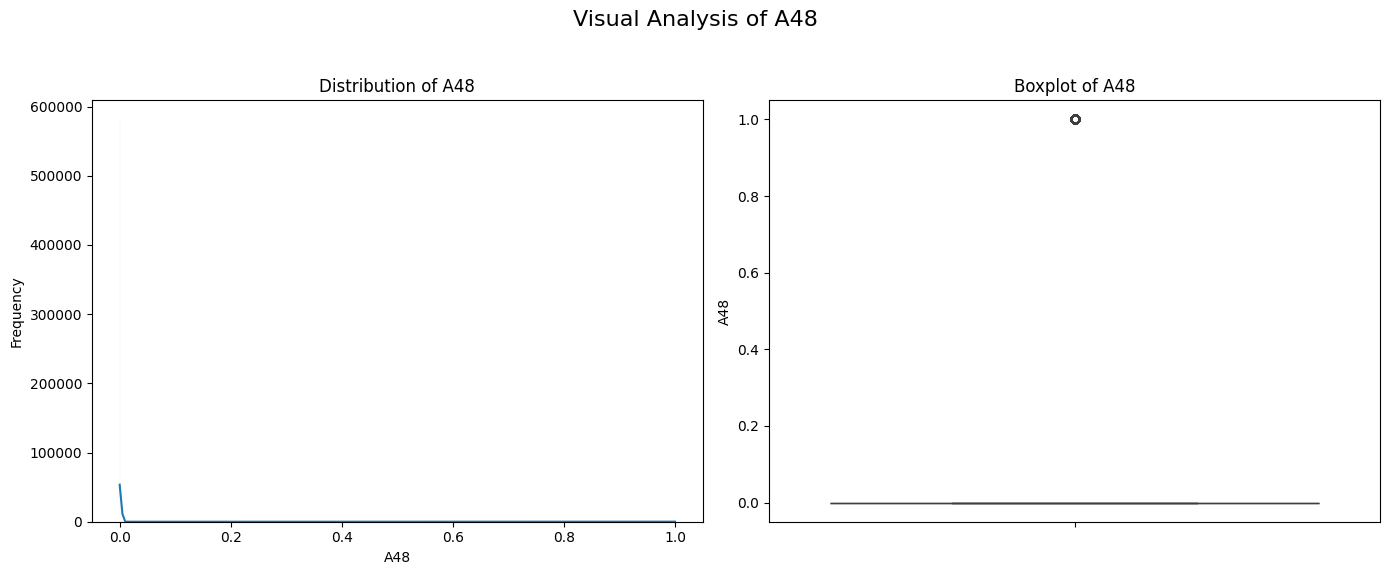

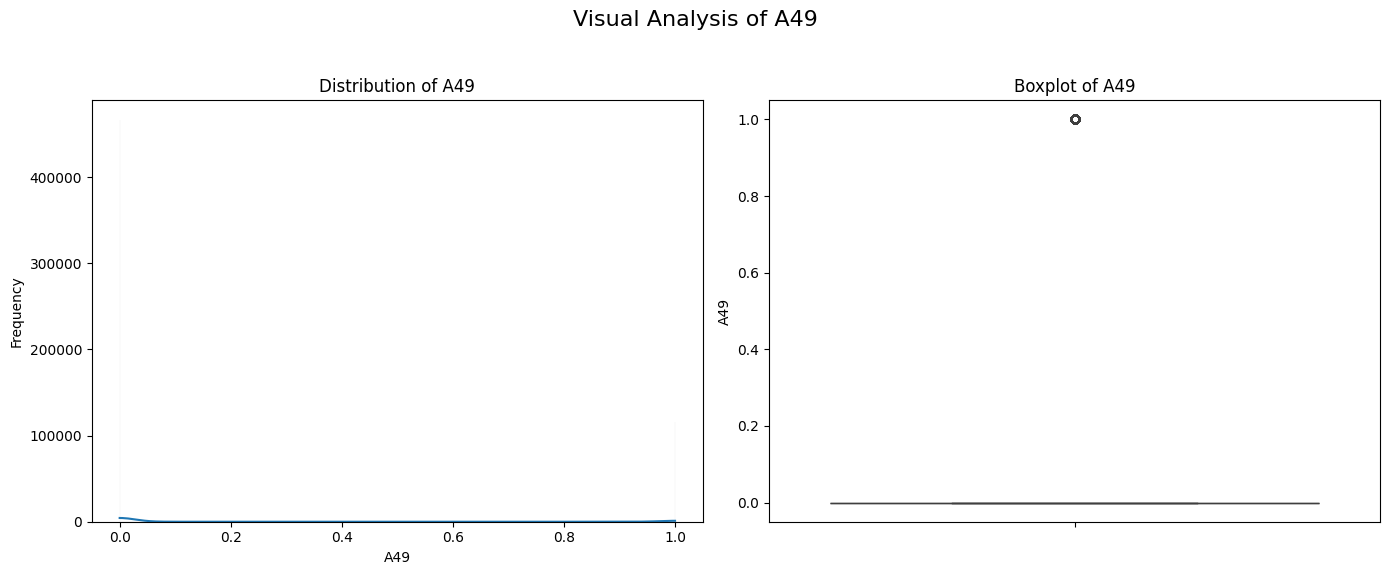

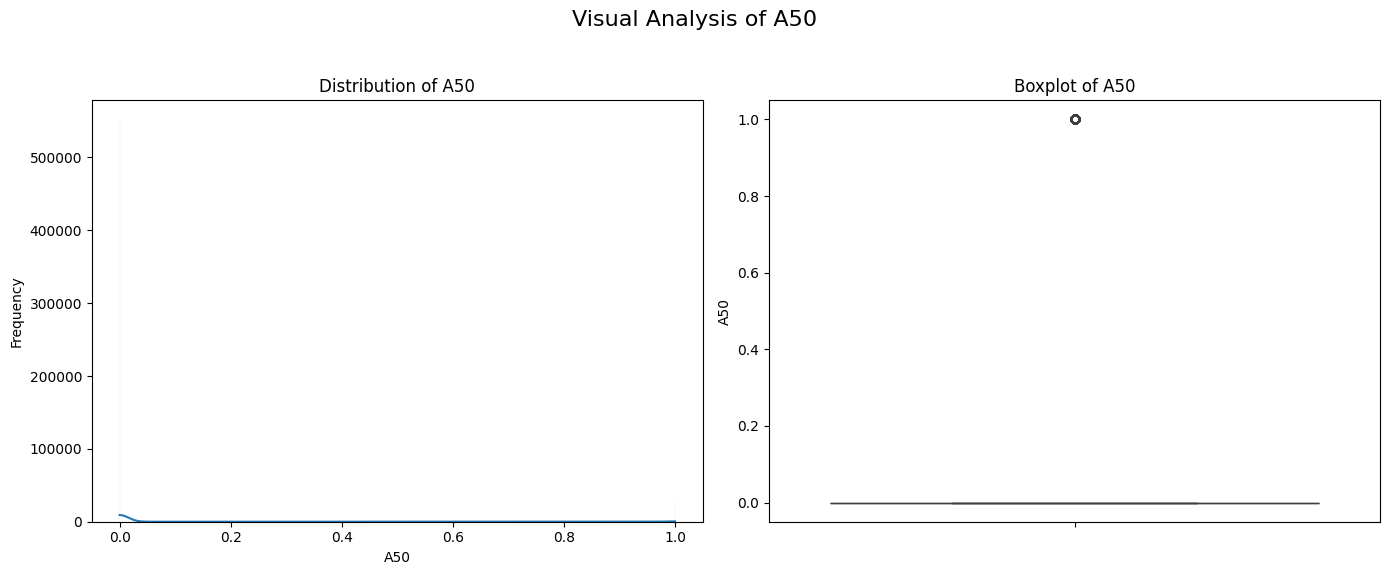

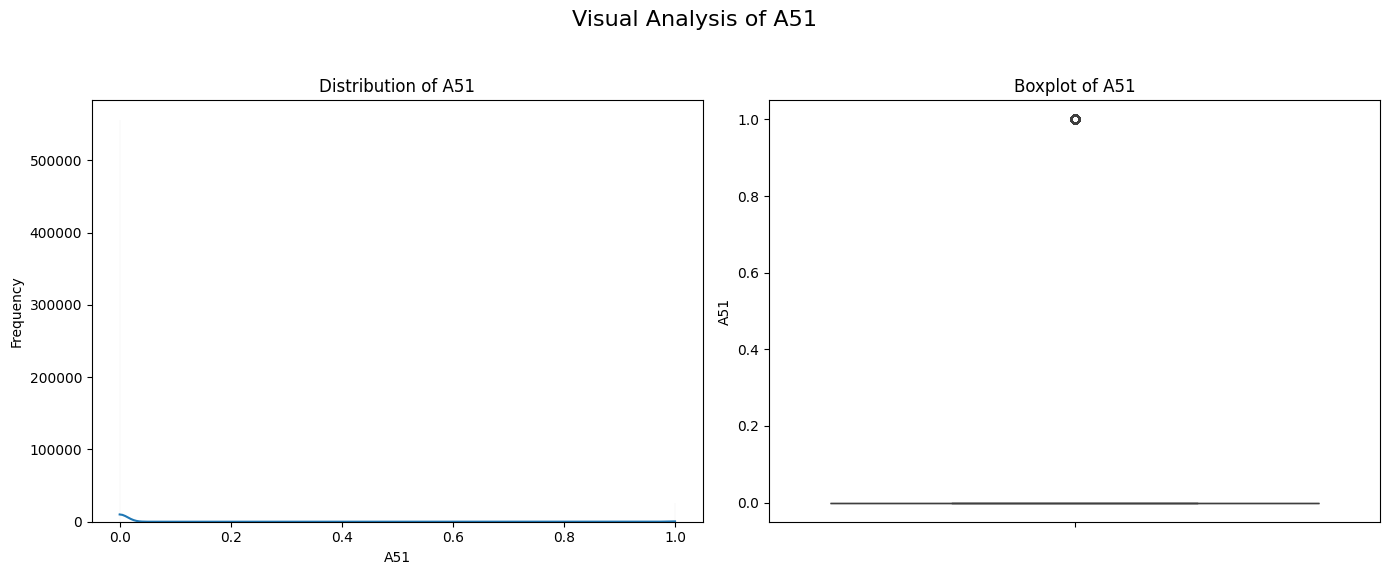

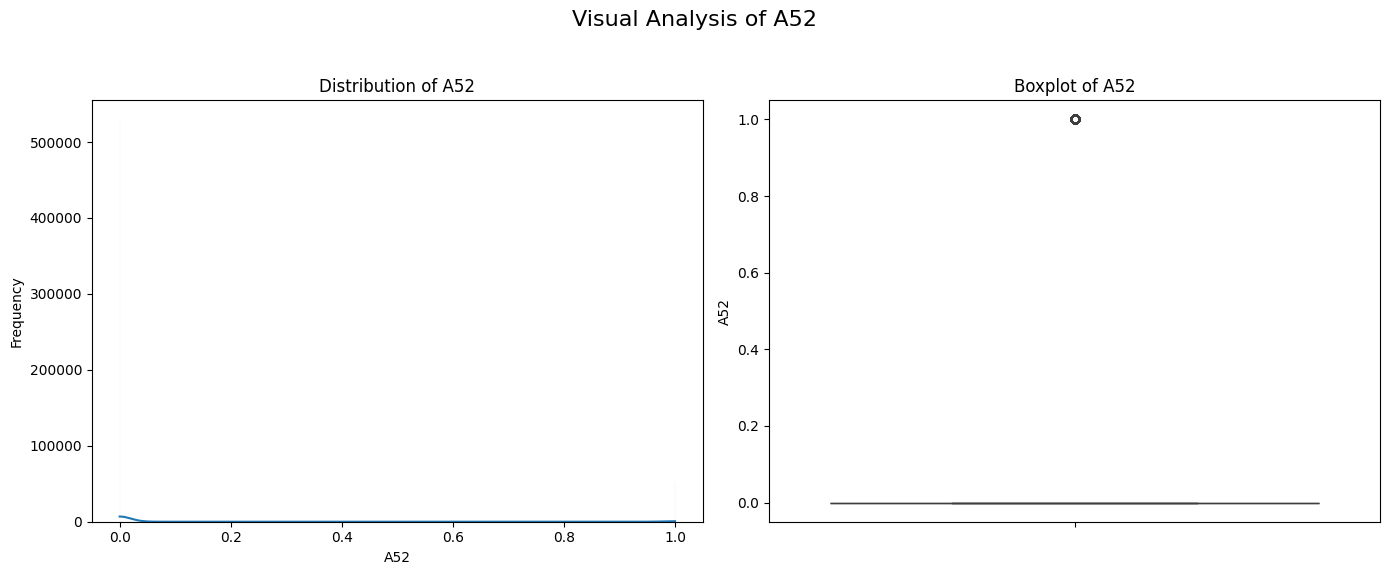

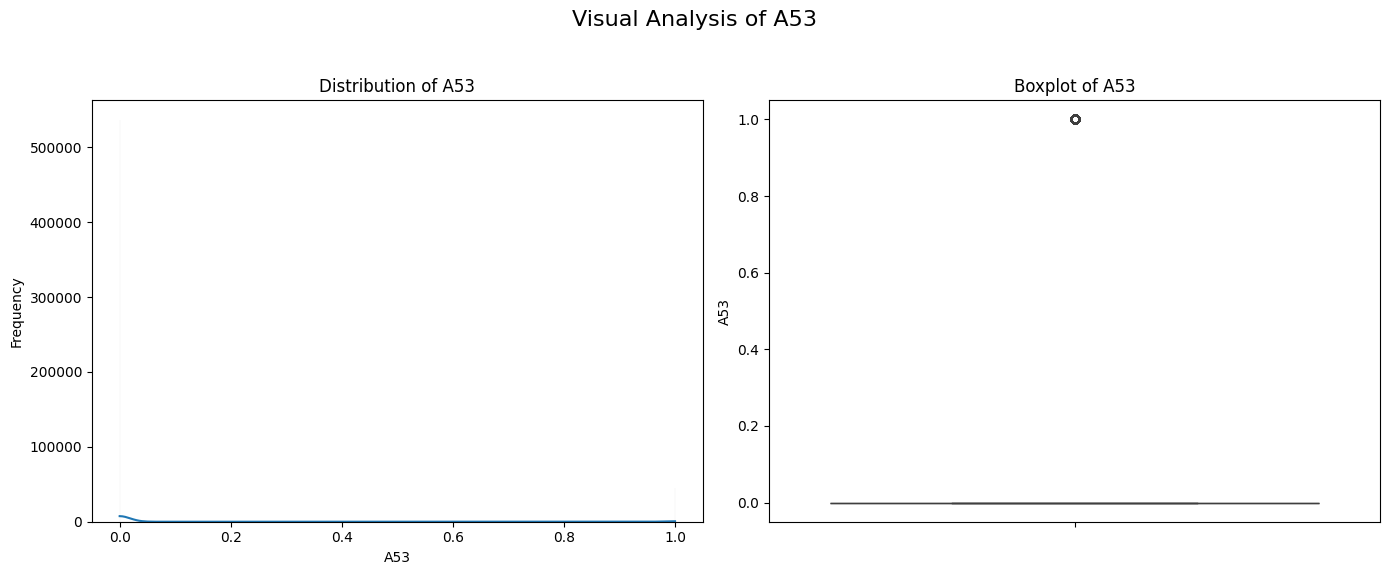

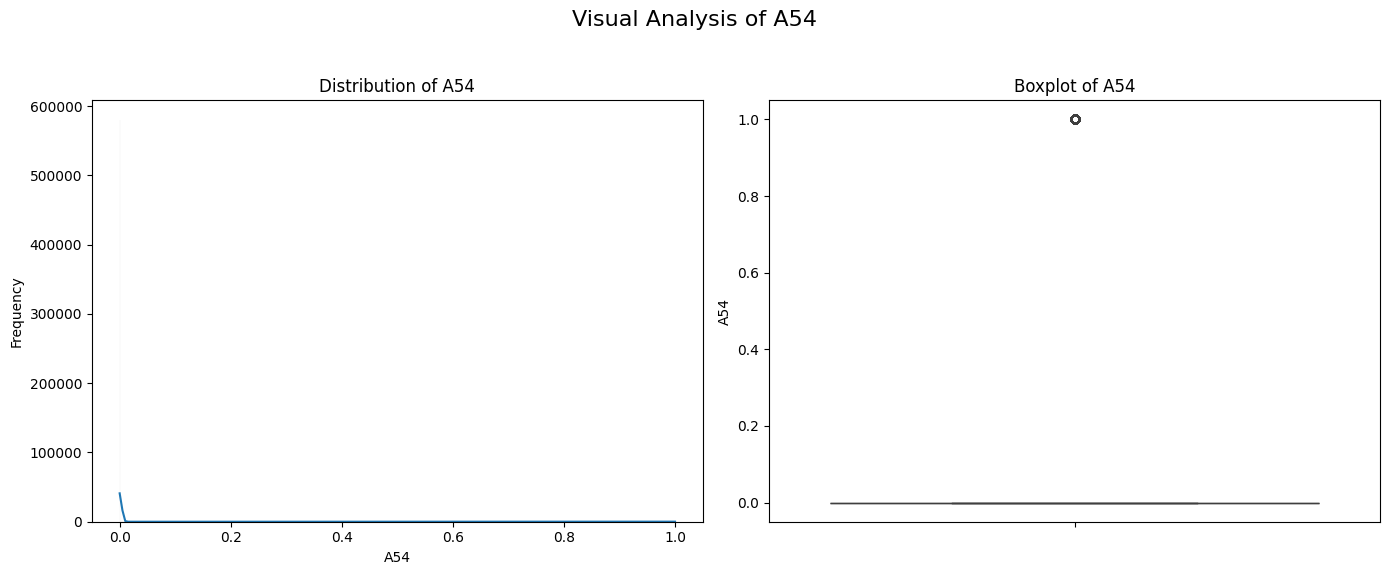

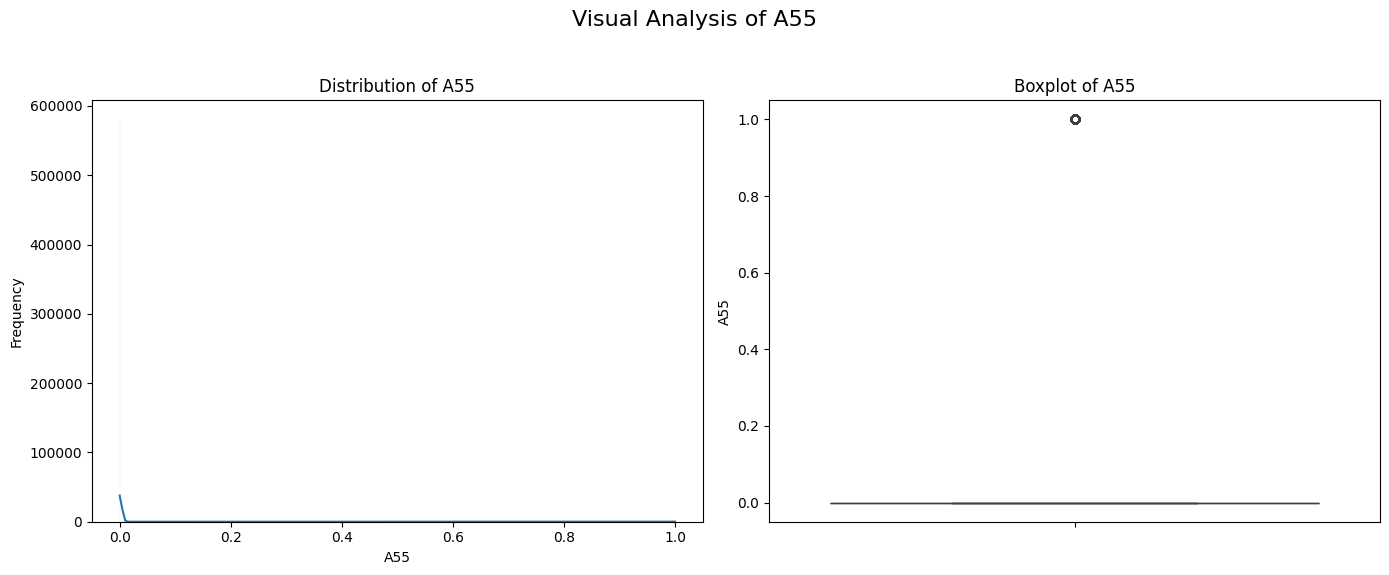

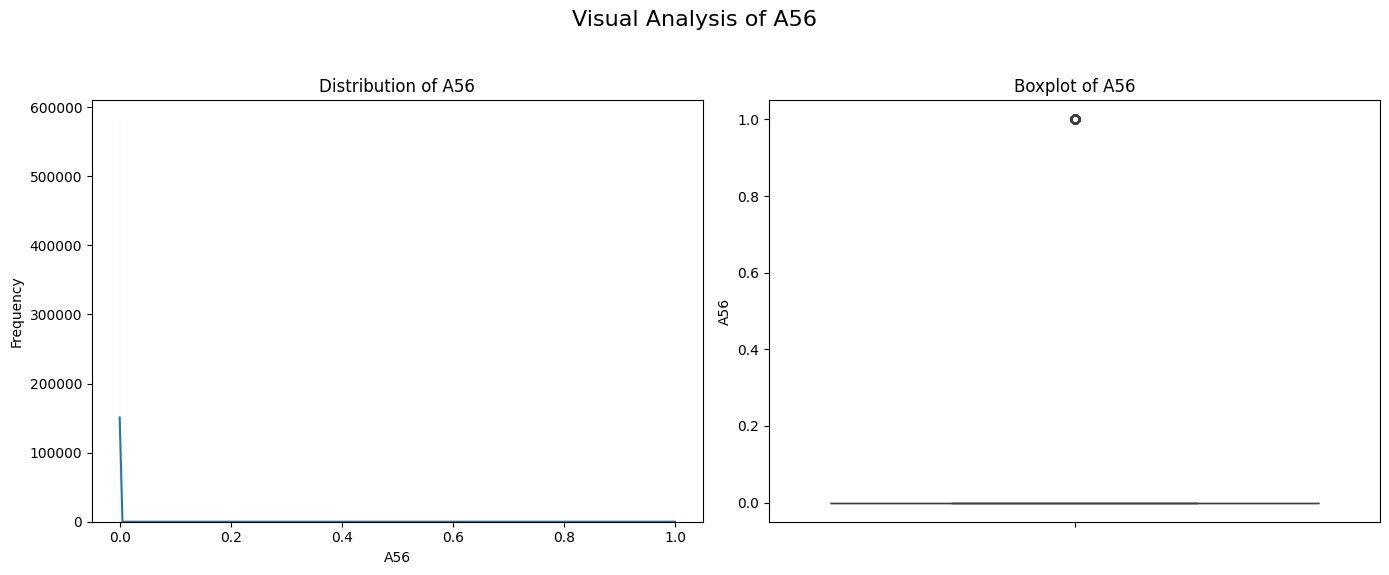

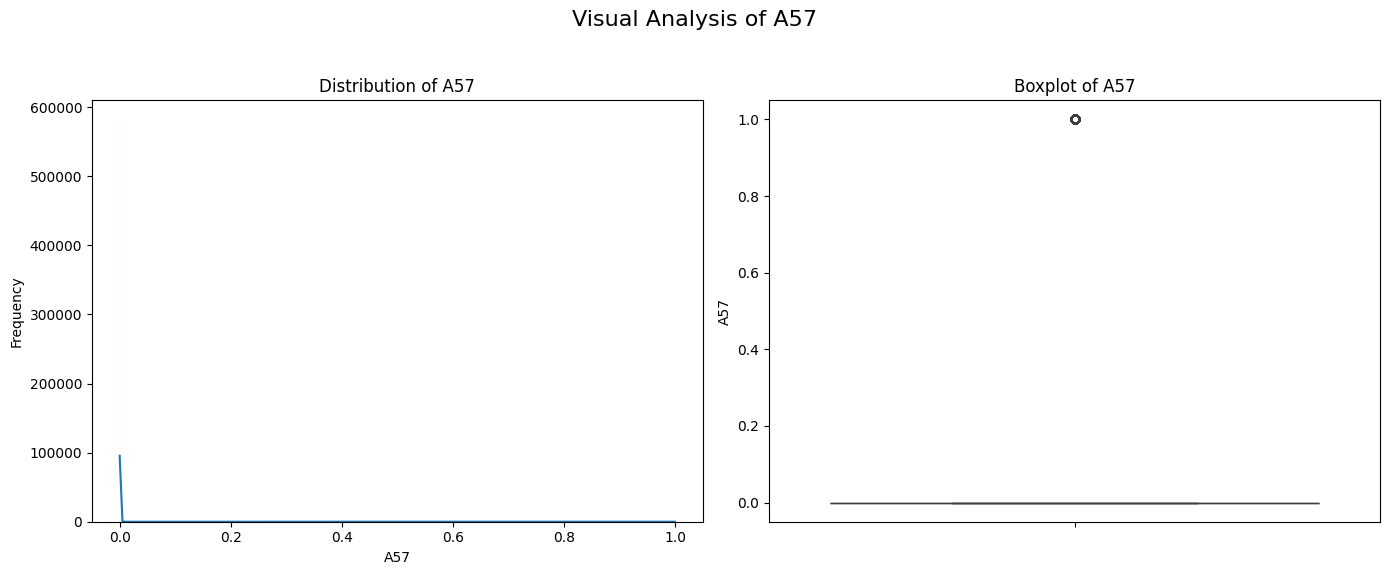

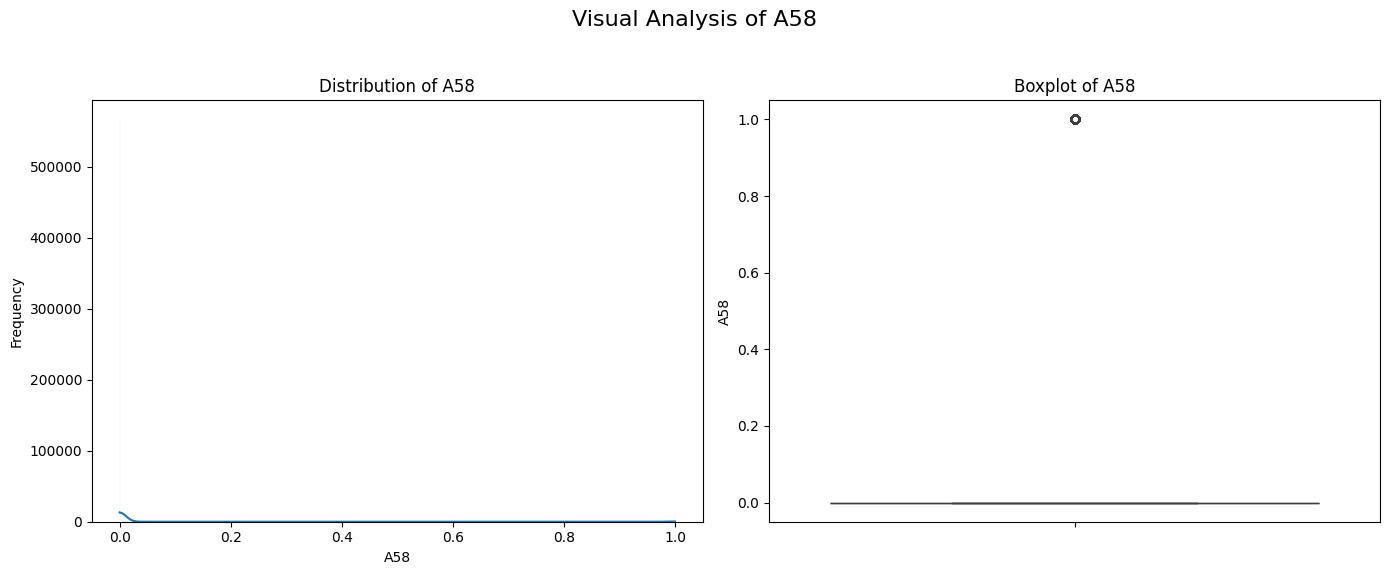

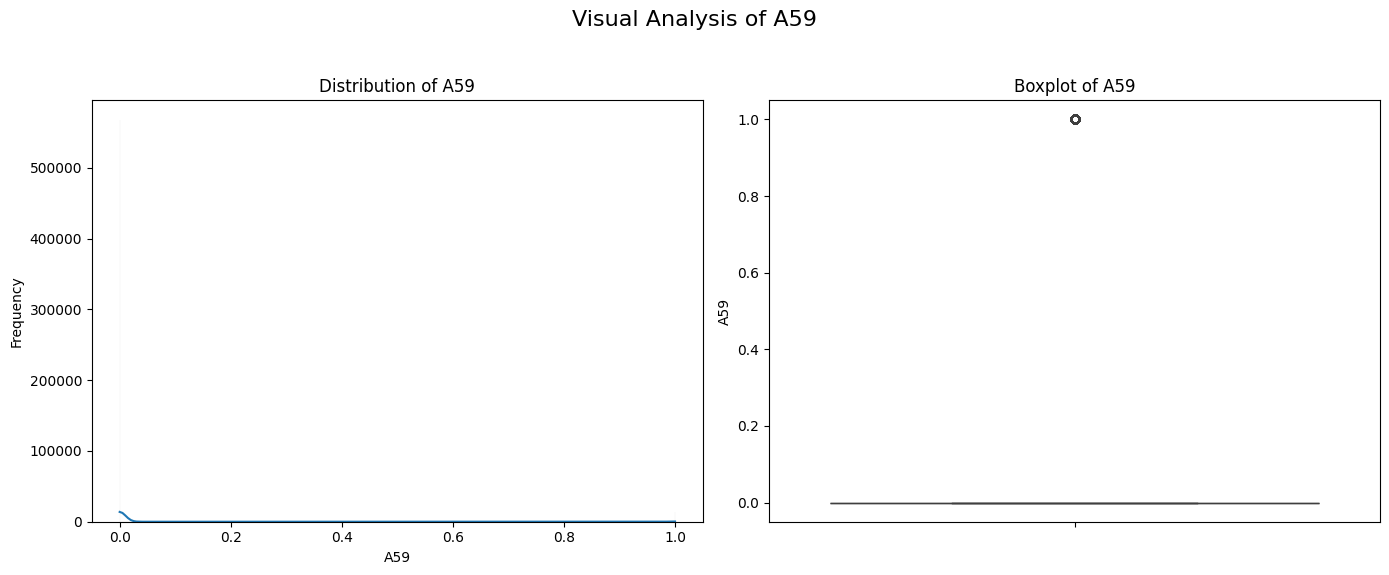

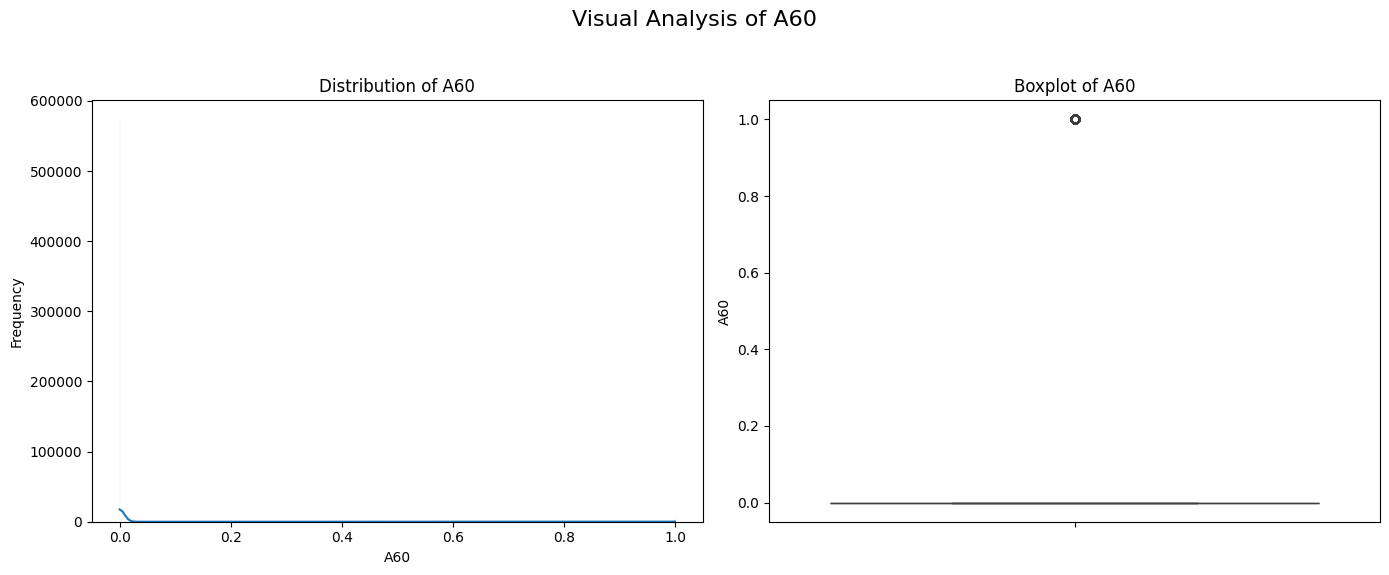

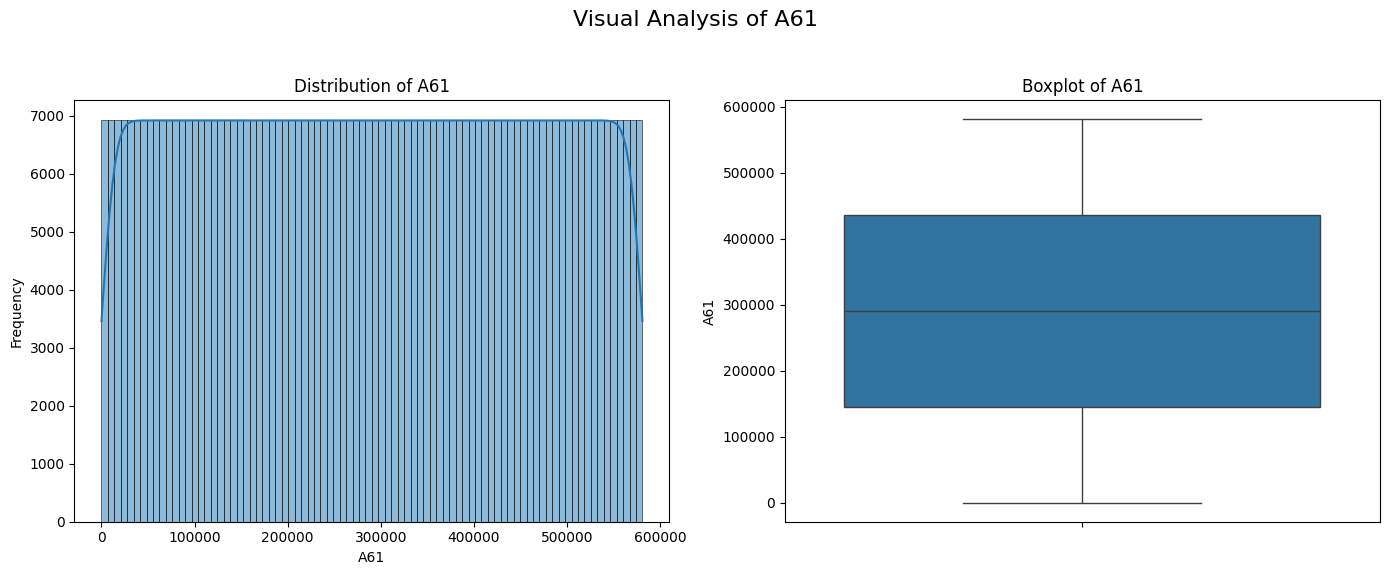

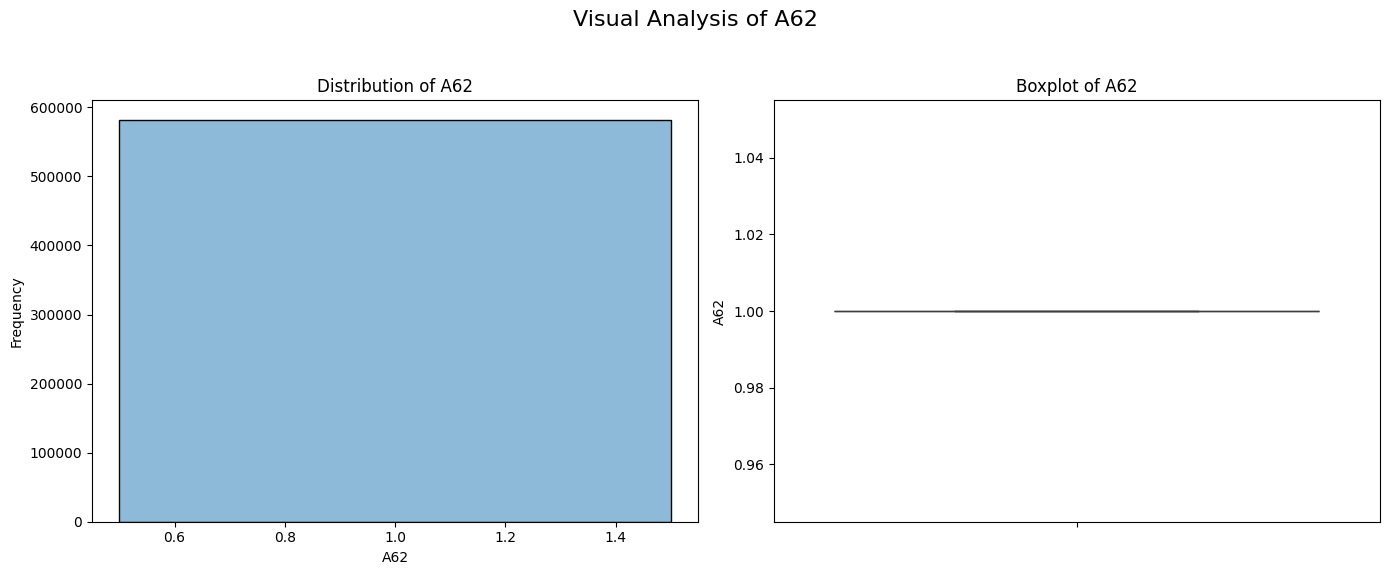

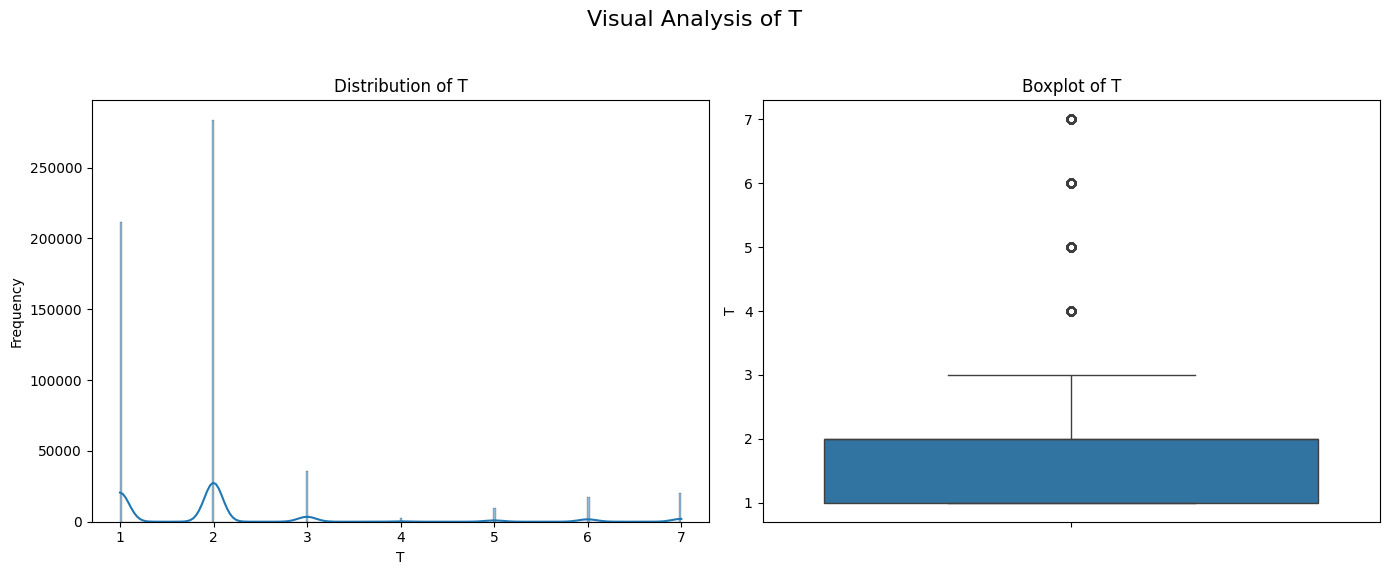

In [13]:
for column in df.columns:
    if column != 'A10':
        feature_distribution(column)
    else:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle('Visual Analysis of A10', fontsize=16)

        sns.histplot(x=a10_numeric, kde=True, ax=axes[0])
        axes[0].set_title('Distribution of A10')
        axes[0].set_xlabel('A10')
        axes[0].set_ylabel('Frequency')

        sns.boxplot(y=a10_numeric, ax=axes[1])
        axes[1].set_title('Boxplot of A10')
        axes[1].set_ylabel('A10')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()